In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten    
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.layers.convolutional import Convolution2D
#from keras.layers.convolutional import MaxPooling2D
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import zipfile

In [4]:
# Clusters
import zipfile
with zipfile.ZipFile("customer_clusters.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
timeseries_eight_clusters.csv                  2019-01-10 11:00:34      7695759
timeseries_features_three_clusters.csv         2019-01-10 10:55:06      7695759
timeseries_features_two_clusters.csv           2019-01-10 10:55:22      7695759
timeseries_fifteen_clusters.csv                2019-01-10 10:56:36      7696246
Extracting all the files
Done!


In [5]:
df = pd.read_csv("timeseries_eight_clusters.csv")
df.head()

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,

,Unnamed: 0,fv_cost,fv_cost.1,fv_cost.2,fv_cost.3,fv_cost.4,fv_cost.5,fv_cost.6,fv_cost.7,fv_cost.8,...,fv_cost.1453,fv_cost.1454,fv_cost.1455,fv_cost.1456,fv_cost.1457,fv_cost.1458,fv_cost.1459,fv_cost.1460,fv_cost.1461,cluster_lables
0,dates,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,...,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30,2017-12-31,2018-01-01,NaN
1,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1009141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.47896,-1.2677647,-1.0565412,-0.84528947,-0.6340095,-0.4227012,-0.21136473,0.0,0.211393,5.0
3,1010055,-4.391553,-3.568215,-2.7447665,-1.921208,-1.0975395,-0.27376094,0.5501278,1.3741267,2.1982358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1018494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [6]:
# first take the lcusters and transpose the data
df.cluster_lables.describe()

count    847.000000
mean       5.540732
std        0.647184
min        1.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: cluster_lables, dtype: float64

In [7]:
for i in range(1,8):
    clust_i = df[df.cluster_lables == i]
    print (len(clust_i))
    


2
5
5
1
347
483
3


In [8]:
# only 2 big clusters in 8 clusters dataset
clust_5 = df[df.cluster_lables == 5]
clust_6 = df[df.cluster_lables == 6]
clust_dates = df.iloc[0]
#transpose of dataframe to have dates as rows and customers as colmns and values fv_cost
trans_clust_5 = clust_5.T
#print (trans_clust_5.head())
trans_clust_5.set_index(clust_dates,inplace=True)
trans_clust_5.columns = trans_clust_5.iloc[0]
trans_clust_5.columns = trans_clust_5.columns.get_level_values(0)
trans_clust_5=trans_clust_5.drop(trans_clust_5.index[0])
trans_clust_5 = trans_clust_5.reset_index()
# renaming column value
trans_clust_5.columns.values[[0]] = ['dates']
trans_clust_5



dates,dates,1009141,1010055,1018494,1050905,1062204,1068307,1070059,1076253,1078122,...,9698949,9706550,9723714,9748024,9830170,9875212,9882286,9906584,9911855,9976817
0,2014-01-01,0.0,-4.391553,0.0,-144.73338,0.0,-77.77693,0.0,-90.65799,0.0,...,0,0,0,0,0,0,-9.87685,-65.6805,0,0
1,2014-01-02,0.0,-3.568215,0.0,-138.16383,0.0,-74.07822,0.0,-85.27575,0.0,...,0,0,0,0,0,0,-38.792,-62.4336,0,0
2,2014-01-03,0.0,-2.7447665,0.0,-131.59338,0.0,-70.37901,0.0,-79.892784,0.0,...,0,0,0,0,0,0,-37.1162,-59.1863,0,0
3,2014-01-04,0.0,-1.921208,0.0,-125.02207,0.0,-66.679306,0.0,-74.5091,0.0,...,0,0,0,0,0,0,-35.4402,-55.9385,0,0
4,2014-01-05,0.0,-1.0975395,0.0,-118.449875,0.0,-62.979107,0.0,-69.1247,0.0,...,0,0,0,0,0,0,-33.764,-52.6903,0,0
5,2014-01-06,0.0,-0.27376094,0.0,-111.8768,0.0,-59.278416,0.0,-63.739582,0.0,...,0,0,0,0,0,0,-32.0875,-49.4416,0,0
6,2014-01-07,0.0,0.5501278,0.0,-105.30285,0.0,-55.57723,0.0,-58.35374,0.0,...,0,0,0,0,0,0,-24.4824,-46.1926,0,0
7,2014-01-08,0.0,1.3741267,0.0,-98.72801,0.0,-51.875546,0.0,-52.967182,0.0,...,0,0,0,0,0,0,-23.4638,-42.943,0,0
8,2014-01-09,0.0,2.1982358,0.0,-92.152306,0.0,-48.173367,0.0,-47.5799,0.0,...,0,0,0,0,0,0,-22.4452,-39.6931,0,0
9,2014-01-10,0.0,3.0224547,0.0,-85.575714,0.0,-44.470695,0.0,-42.1919,0.0,...,0,0,0,0,0,0,-21.4264,-36.4427,0,0


In [9]:
#split data into train and test
train_x = trans_clust_5[trans_clust_5['dates'].str.contains('2018-') == False]
test_x = trans_clust_5[(trans_clust_5['dates'].str.contains('2018-') == True) | (trans_clust_5['dates'].str.contains('2017-12') == True)]

In [10]:

def lag_feature(df, lag=1):
    if not type(df) == pd.DataFrame:
        df = pd.DataFrame(df, columns=['fv_cost'])
    
    def rename_lag(ser, j):
        ser.name = ser.name + f'_{j}'
        return ser
        
    # add a column lagged by `i` steps
    for i in range(1, lag + 1):
        df = df.join(df.fv_cost.shift(i).pipe(rename_lag, i))

    df.dropna(inplace=True)
    return df


def prepare_training_data(series_data, lag):
    " Converts a series of data into a lagged, scaled sample."
    # scale training data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    #cost_vals = scaler.fit_transform(series_data.values.reshape(-1, 1))
    cost_vals = scaler.fit_transform(series_data.reshape(-1, 1))
    # convert series to lagged features
    cost_lagged = lag_feature(cost_vals, lag=lag)

    # X, y format taking the first column (original time series) to be the y
    X = cost_lagged.drop('fv_cost', axis=1).values
    y = cost_lagged.fv_cost.values
    
    # keras expects 3 dimensional X
    X = X.reshape(X.shape[0], 1, X.shape[1])
    
    return X, y, scaler

In [11]:
# 3 lags for each data point as input to model
lag =  3

# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)

# instantiate a sequential model
model = Sequential()

#add convolution layer

#Convolution2D (https://keras.io/layers/convolutional/) expects the input to be in the format (samples, rows, cols, channels), 
#which is "channels-last". data is in the format (samples, channels, rows, cols). You should be able to fix
#this using the optional keyword data_format = 'channels_first' when declaring the Convolution2D layer else use
# input_shape=(3,1).
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
#model.add(Flatten()) # as flatten is converting data into 1D but we need 3D for our 3lags data here

# add LSTM layer - stateful MUST be true here in 
# order to learn the patterns within a series
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))

# followed by a dense layer with a single output for regression
model.add(Dense(1))
# we can add dropoutlayer after dense as well again
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

In [12]:
#remove dates 

In [13]:
%%time
# build model over clust 5 customers where each column is a customer fv_cost
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()
for i in range(1,len(trans_clust_5.columns)):
#    cust_data = trans_clust_5.iloc[i]
    cust_id = trans_clust_5.columns[i]
    print ("customer number ",i)
    
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
    result_prediction.to_csv("predictions_clusters/prediction_clust_5_347customers/predictions_for_client_"+str(cust_id)+".csv")
    i=i+1
    model.reset_states()

customer number  1


/Users/anusha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/anusha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
 - 13s - loss: 0.1578
Epoch 2/10
 - 12s - loss: 0.1389
Epoch 3/10


KeyboardInterrupt: 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

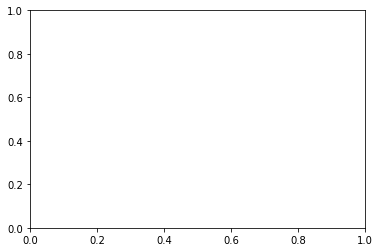

In [14]:
plt.bar(range(1,len(trans_clust_5.columns)),actual_error_scores_test,10)

In [ ]:
 ################### Experiment  
i=1
cust_id = trans_clust_5.columns[i]
print ("customer number ",i)

train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
train_rmse.append(trainScore)
test_rmse.append(testScore)
    # generate predictions for training
trainPredict = model.predict(train_x_cust,batch_size=1)
testPredict = model.predict(test_x_cust,batch_size=1)
yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
print(cust_id," Test RMSE: ",rmse_test)
actual_error_scores_test.append(rmse_test)
yhat_act_train = scalar_train.inverse_transform(trainScore)
rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
actual_train_rmse.append(rmse_train)
    # write predictions into csv
result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
result_prediction['original_fv_scaled'] = test_y_cust
result_prediction['prediction_scaled'] = testPredict
result_prediction['prediction_actual'] = yhat_act_test
result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
result_prediction.to_csv("predictions_clusters/prediction_clust_5_347customers/predictions_for_client_"+str(cust_id)+".csv")
model.reset_states()

In [12]:
# Cluster 2 model
trans_clust_6 = clust_6.T
#print (trans_clust_5.head())
trans_clust_6.set_index(clust_dates,inplace=True)
trans_clust_6.columns = trans_clust_6.iloc[0]
trans_clust_6.columns = trans_clust_6.columns.get_level_values(0)
trans_clust_6=trans_clust_6.drop(trans_clust_6.index[0])
trans_clust_6 = trans_clust_6.reset_index()
# renaming column value
trans_clust_6.columns.values[[0]] = ['dates']
trans_clust_6


dates,dates,1020907,1029070,1029119,1040358,1051909,1064371,1069677,1069728,1071798,...,9782079,9783520,9857915,9911561,9970452,9985085,9986022,9995153,10034994,10058397
0,2014-01-01,21.17247,-1.3651108,-104.11878,0.0,0.0,0.0,0.0,-2016.4852,-485.61163,...,0,-7.03608,0,0,0,392.89,0,0,0,0
1,2014-01-02,21.81552,-2.2687392,-89.25063,0.0,0.0,0.0,0.0,-1883.9456,-463.14435,...,0,-40.4701,0,-1.84748,0,394.111,0,0,0,0
2,2014-01-03,22.458654,-2.2178807,-74.3805,0.0,0.0,0.0,0.0,-1751.3883,-440.67404,...,0,-37.7229,0,-1.78389,0,395.332,0,0,0,0
3,2014-01-04,23.101875,-2.1670153,-59.508377,0.0,0.0,0.0,0.0,-1618.8132,-418.20074,...,0,-34.9754,0,-1.7203,0,396.553,0,0,0,0
4,2014-01-05,23.745184,-2.116143,-44.634266,0.0,0.0,0.0,0.0,-1486.2205,-395.72443,...,0,-32.2274,0,-1.65669,0,397.774,0,0,0,0
5,2014-01-06,24.388577,-2.065264,-29.758165,0.0,0.0,0.0,0.0,-1353.61,-373.24512,...,0,-29.4791,0,-1.59308,0,398.996,0,0,0,0
6,2014-01-07,25.032055,-2.014378,-14.880077,0.0,0.0,0.0,0.0,-1220.9818,-350.76282,...,0,-26.7305,0,-1.52946,0,400.217,0,0,0,0
7,2014-01-08,25.675621,-1.9634854,0.0,0.0,0.0,0.0,0.0,-1088.3359,-328.2775,...,0,-23.9814,0,-1.46583,0,401.439,0,0,0,0
8,2014-01-09,26.319271,-1.912586,14.882067,0.0,0.0,0.0,0.0,-1188.482,-305.78915,...,0,-21.2321,0,-1.40219,0,402.661,0,0,0,0
9,2014-01-10,26.963009,-1.8616797,29.766123,0.0,0.0,0.0,0.0,-1047.7877,-283.29782,...,0,-18.4823,0,-1.33854,0,403.883,0,0,0,0


In [75]:
%%time
#split data into train and test
train_x = trans_clust_6[trans_clust_6['dates'].str.contains('2018-') == False]
test_x = trans_clust_6[(trans_clust_6['dates'].str.contains('2018-') == True) | (trans_clust_6['dates'].str.contains('2017-12') == True)]

# 3 lags for each data point as input to model
lag =  3

# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)

# instantiate a sequential model
model = Sequential()
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(1))
# we can add dropoutlayer after dense as well again
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

# build model over clust 5 customers where each column is a customer fv_cost
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()
for i in range(1,len(trans_clust_6.columns)):
#    cust_data = trans_clust_5.iloc[i]
    cust_id = trans_clust_6.columns[i]
    print ("customer number ",i)
    
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x.iloc[:,i], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x.iloc[:,i], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.iloc[-(len(yhat_act_test)):,i], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.iloc[-(len(yhat_act_train)):,i],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.iloc[-(len(yhat_act_test)):,i]
    result_prediction.to_csv("predictions_clusters/prediction_clust_6_483customers/predictions_for_client_"+str(cust_id)+".csv")
    i=i+1
    model.reset_states()

customer number  1


/Users/anusha/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Epoch 1/10
 - 11s - loss: 0.2337
Epoch 2/10
 - 10s - loss: 0.1998
Epoch 3/10
 - 10s - loss: 0.2250
Epoch 4/10
 - 10s - loss: 0.2201
Epoch 5/10
 - 10s - loss: 0.2252
Epoch 6/10
 - 9s - loss: 0.2050
Epoch 7/10
 - 9s - loss: 0.2195
Epoch 8/10
 - 9s - loss: 0.2086
Epoch 9/10
 - 9s - loss: 0.2094
Epoch 10/10
 - 9s - loss: 0.2240
1020907  Test RMSE:  0.09951654076576233
customer number  2
Epoch 1/10
 - 9s - loss: 0.1124
Epoch 2/10
 - 9s - loss: 0.1387
Epoch 3/10
 - 9s - loss: 0.1717
Epoch 4/10
 - 9s - loss: 0.1689
Epoch 5/10
 - 10s - loss: 0.1610
Epoch 6/10
 - 9s - loss: 0.1769
Epoch 7/10
 - 9s - loss: 0.1681
Epoch 8/10
 - 9s - loss: 0.1446
Epoch 9/10
 - 10s - loss: 0.1411
Epoch 10/10
 - 9s - loss: 0.1410
1029070  Test RMSE:  0.3081687207615378
customer number  3
Epoch 1/10
 - 9s - loss: 0.1035
Epoch 2/10
 - 9s - loss: 0.0980
Epoch 3/10
 - 9s - loss: 0.0945
Epoch 4/10
 - 10s - loss: 0.1035
Epoch 5/10
 - 9s - loss: 0.0988
Epoch 6/10
 - 9s - loss: 0.1065
Epoch 7/10
 - 9s - loss: 0.1017
Epoch 8

Epoch 7/10
 - 9s - loss: 0.1653
Epoch 8/10
 - 9s - loss: 0.1729
Epoch 9/10
 - 9s - loss: 0.1698
Epoch 10/10
 - 9s - loss: 0.1593
1141004  Test RMSE:  0.20065928841472339
customer number  23
Epoch 1/10
 - 9s - loss: 0.1262
Epoch 2/10
 - 9s - loss: 0.1282
Epoch 3/10
 - 9s - loss: 0.1263
Epoch 4/10
 - 9s - loss: 0.1373
Epoch 5/10
 - 9s - loss: 0.1340
Epoch 6/10
 - 9s - loss: 0.1291
Epoch 7/10
 - 9s - loss: 0.1297
Epoch 8/10
 - 9s - loss: 0.1373
Epoch 9/10
 - 9s - loss: 0.1180
Epoch 10/10
 - 9s - loss: 0.1327
1141325  Test RMSE:  2.2849695631439984
customer number  24
Epoch 1/10
 - 9s - loss: 0.1403
Epoch 2/10
 - 9s - loss: 0.1421
Epoch 3/10
 - 9s - loss: 0.1616
Epoch 4/10
 - 9s - loss: 0.1500
Epoch 5/10
 - 9s - loss: 0.1478
Epoch 6/10
 - 9s - loss: 0.1523
Epoch 7/10
 - 9s - loss: 0.1360
Epoch 8/10
 - 9s - loss: 0.1473
Epoch 9/10
 - 9s - loss: 0.1451
Epoch 10/10
 - 9s - loss: 0.1480
1158954  Test RMSE:  0.22822902120400856
customer number  25
Epoch 1/10
 - 9s - loss: 0.2058
Epoch 2/10
 - 9

 - 9s - loss: 0.1158
Epoch 2/10
 - 9s - loss: 0.1196
Epoch 3/10
 - 10s - loss: 0.1098
Epoch 4/10
 - 9s - loss: 0.1120
Epoch 5/10
 - 9s - loss: 0.1159
Epoch 6/10
 - 9s - loss: 0.1141
Epoch 7/10
 - 9s - loss: 0.1132
Epoch 8/10
 - 9s - loss: 0.1128
Epoch 9/10
 - 9s - loss: 0.1093
Epoch 10/10
 - 9s - loss: 0.1193
1347697  Test RMSE:  12.981567410515192
customer number  45
Epoch 1/10
 - 9s - loss: 0.1208
Epoch 2/10
 - 10s - loss: 0.1175
Epoch 3/10
 - 9s - loss: 0.1105
Epoch 4/10
 - 9s - loss: 0.1133
Epoch 5/10
 - 9s - loss: 0.1212
Epoch 6/10
 - 9s - loss: 0.1203
Epoch 7/10
 - 9s - loss: 0.1199
Epoch 8/10
 - 10s - loss: 0.1254
Epoch 9/10
 - 10s - loss: 0.1096
Epoch 10/10
 - 10s - loss: 0.1189
1361243  Test RMSE:  8.488556937492588
customer number  46
Epoch 1/10
 - 9s - loss: 0.2047
Epoch 2/10
 - 9s - loss: 0.2062
Epoch 3/10
 - 10s - loss: 0.1881
Epoch 4/10
 - 10s - loss: 0.2099
Epoch 5/10
 - 9s - loss: 0.2050
Epoch 6/10
 - 9s - loss: 0.2001
Epoch 7/10
 - 9s - loss: 0.1865
Epoch 8/10
 - 9s - 

Epoch 7/10
 - 9s - loss: 0.1300
Epoch 8/10
 - 9s - loss: 0.1310
Epoch 9/10
 - 10s - loss: 0.1308
Epoch 10/10
 - 9s - loss: 0.1259
1456793  Test RMSE:  0.2274360461482675
customer number  66
Epoch 1/10
 - 9s - loss: 0.1503
Epoch 2/10
 - 9s - loss: 0.1543
Epoch 3/10
 - 9s - loss: 0.1475
Epoch 4/10
 - 9s - loss: 0.1461
Epoch 5/10
 - 10s - loss: 0.1379
Epoch 6/10
 - 9s - loss: 0.1449
Epoch 7/10
 - 9s - loss: 0.1498
Epoch 8/10
 - 9s - loss: 0.1451
Epoch 9/10
 - 9s - loss: 0.1390
Epoch 10/10
 - 9s - loss: 0.1431
1462212  Test RMSE:  0.22527987278748568
customer number  67
Epoch 1/10
 - 9s - loss: 0.0427
Epoch 2/10
 - 9s - loss: 0.0426
Epoch 3/10
 - 10s - loss: 0.0431
Epoch 4/10
 - 10s - loss: 0.0431
Epoch 5/10
 - 9s - loss: 0.0396
Epoch 6/10
 - 9s - loss: 0.0397
Epoch 7/10
 - 10s - loss: 0.0440
Epoch 8/10
 - 10s - loss: 0.0456
Epoch 9/10
 - 10s - loss: 0.0403
Epoch 10/10
 - 10s - loss: 0.0449
1463965  Test RMSE:  0.24711762214559263
customer number  68
Epoch 1/10
 - 10s - loss: 0.1055
Epoch 

 - 9s - loss: 0.0865
Epoch 2/10
 - 9s - loss: 0.0960
Epoch 3/10
 - 9s - loss: 0.0880
Epoch 4/10
 - 9s - loss: 0.0886
Epoch 5/10
 - 9s - loss: 0.0868
Epoch 6/10
 - 9s - loss: 0.0894
Epoch 7/10
 - 9s - loss: 0.0882
Epoch 8/10
 - 9s - loss: 0.0956
Epoch 9/10
 - 9s - loss: 0.0905
Epoch 10/10
 - 9s - loss: 0.0909
1600536  Test RMSE:  0.24115756051298542
customer number  88
Epoch 1/10
 - 9s - loss: 0.1788
Epoch 2/10
 - 9s - loss: 0.1750
Epoch 3/10
 - 9s - loss: 0.1662
Epoch 4/10
 - 9s - loss: 0.1652
Epoch 5/10
 - 9s - loss: 0.1653
Epoch 6/10
 - 9s - loss: 0.1619
Epoch 7/10
 - 9s - loss: 0.1524
Epoch 8/10
 - 9s - loss: 0.1718
Epoch 9/10
 - 9s - loss: 0.1654
Epoch 10/10
 - 9s - loss: 0.1565
1600537  Test RMSE:  0.20917591966431892
customer number  89
Epoch 1/10
 - 9s - loss: 0.0677
Epoch 2/10
 - 9s - loss: 0.0755
Epoch 3/10
 - 9s - loss: 0.0714
Epoch 4/10
 - 9s - loss: 0.0747
Epoch 5/10
 - 9s - loss: 0.0713
Epoch 6/10
 - 9s - loss: 0.0739
Epoch 7/10
 - 9s - loss: 0.0681
Epoch 8/10
 - 9s - loss

Epoch 7/10
 - 9s - loss: 0.0210
Epoch 8/10
 - 8s - loss: 0.0191
Epoch 9/10
 - 9s - loss: 0.0233
Epoch 10/10
 - 9s - loss: 0.0182
1679300  Test RMSE:  0.25589813960012153
customer number  109
Epoch 1/10
 - 9s - loss: 0.1622
Epoch 2/10
 - 9s - loss: 0.1433
Epoch 3/10
 - 9s - loss: 0.1471
Epoch 4/10
 - 9s - loss: 0.1557
Epoch 5/10
 - 9s - loss: 0.1550
Epoch 6/10
 - 9s - loss: 0.1583
Epoch 7/10
 - 9s - loss: 0.1527
Epoch 8/10
 - 9s - loss: 0.1608
Epoch 9/10
 - 9s - loss: 0.1643
Epoch 10/10
 - 9s - loss: 0.1670
1679537  Test RMSE:  4.784657861113748
customer number  110
Epoch 1/10
 - 9s - loss: 0.0859
Epoch 2/10
 - 8s - loss: 0.1039
Epoch 3/10
 - 9s - loss: 0.0953
Epoch 4/10
 - 8s - loss: 0.0925
Epoch 5/10
 - 9s - loss: 0.0975
Epoch 6/10
 - 9s - loss: 0.0866
Epoch 7/10
 - 9s - loss: 0.0905
Epoch 8/10
 - 9s - loss: 0.0973
Epoch 9/10
 - 9s - loss: 0.0930
Epoch 10/10
 - 9s - loss: 0.0959
1682398  Test RMSE:  0.5175504546895647
customer number  111
Epoch 1/10
 - 9s - loss: 0.0304
Epoch 2/10
 - 

 - 9s - loss: 0.1202
Epoch 2/10
 - 9s - loss: 0.1163
Epoch 3/10
 - 9s - loss: 0.1166
Epoch 4/10
 - 9s - loss: 0.1064
Epoch 5/10
 - 8s - loss: 0.1109
Epoch 6/10
 - 8s - loss: 0.1165
Epoch 7/10
 - 9s - loss: 0.1093
Epoch 8/10
 - 9s - loss: 0.1063
Epoch 9/10
 - 8s - loss: 0.1162
Epoch 10/10
 - 9s - loss: 0.0998
1813218  Test RMSE:  245.33050705009398
customer number  131
Epoch 1/10
 - 9s - loss: 0.0707
Epoch 2/10
 - 8s - loss: 0.0664
Epoch 3/10
 - 9s - loss: 0.0615
Epoch 4/10
 - 9s - loss: 0.0693
Epoch 5/10
 - 9s - loss: 0.0588
Epoch 6/10
 - 9s - loss: 0.0681
Epoch 7/10
 - 9s - loss: 0.0662
Epoch 8/10
 - 9s - loss: 0.0638
Epoch 9/10
 - 9s - loss: 0.0707
Epoch 10/10
 - 9s - loss: 0.0585
1867816  Test RMSE:  2.8875032563657497
customer number  132
Epoch 1/10
 - 9s - loss: 0.1473
Epoch 2/10
 - 9s - loss: 0.1390
Epoch 3/10
 - 9s - loss: 0.1517
Epoch 4/10
 - 9s - loss: 0.1502
Epoch 5/10
 - 9s - loss: 0.1511
Epoch 6/10
 - 9s - loss: 0.1555
Epoch 7/10
 - 9s - loss: 0.1394
Epoch 8/10
 - 9s - loss

 - 9s - loss: 0.0617
Epoch 7/10
 - 9s - loss: 0.0567
Epoch 8/10
 - 9s - loss: 0.0591
Epoch 9/10
 - 9s - loss: 0.0544
Epoch 10/10
 - 9s - loss: 0.0540
2068271  Test RMSE:  0.1431198620525992
customer number  152
Epoch 1/10
 - 9s - loss: 0.0994
Epoch 2/10
 - 9s - loss: 0.0965
Epoch 3/10
 - 9s - loss: 0.0965
Epoch 4/10
 - 9s - loss: 0.0964
Epoch 5/10
 - 9s - loss: 0.0897
Epoch 6/10
 - 9s - loss: 0.1013
Epoch 7/10
 - 9s - loss: 0.0877
Epoch 8/10
 - 9s - loss: 0.1004
Epoch 9/10
 - 9s - loss: 0.0979
Epoch 10/10
 - 9s - loss: 0.0954
3011305  Test RMSE:  0.2021754442879542
customer number  153
Epoch 1/10
 - 9s - loss: 0.1227
Epoch 2/10
 - 9s - loss: 0.1233
Epoch 3/10
 - 9s - loss: 0.1185
Epoch 4/10
 - 9s - loss: 0.1171
Epoch 5/10
 - 9s - loss: 0.1197
Epoch 6/10
 - 9s - loss: 0.1256
Epoch 7/10
 - 9s - loss: 0.1301
Epoch 8/10
 - 9s - loss: 0.1164
Epoch 9/10
 - 9s - loss: 0.1281
Epoch 10/10
 - 9s - loss: 0.1300
3088871  Test RMSE:  0.8504102002457763
customer number  154
Epoch 1/10
 - 9s - loss: 

Epoch 10/10
 - 9s - loss: 0.0851
3608425  Test RMSE:  0.22341067832092712
customer number  173
Epoch 1/10
 - 9s - loss: 0.1278
Epoch 2/10
 - 9s - loss: 0.1450
Epoch 3/10
 - 9s - loss: 0.1361
Epoch 4/10
 - 9s - loss: 0.1439
Epoch 5/10
 - 9s - loss: 0.1549
Epoch 6/10
 - 9s - loss: 0.1525
Epoch 7/10
 - 9s - loss: 0.1473
Epoch 8/10
 - 9s - loss: 0.1365
Epoch 9/10
 - 9s - loss: 0.1401
Epoch 10/10
 - 9s - loss: 0.1383
4528948  Test RMSE:  0.2045367956161499
customer number  174
Epoch 1/10
 - 10s - loss: 0.1378
Epoch 2/10
 - 9s - loss: 0.1747
Epoch 3/10
 - 10s - loss: 0.1688
Epoch 4/10
 - 10s - loss: 0.1637
Epoch 5/10
 - 9s - loss: 0.1575
Epoch 6/10
 - 9s - loss: 0.1769
Epoch 7/10
 - 9s - loss: 0.1675
Epoch 8/10
 - 9s - loss: 0.1695
Epoch 9/10
 - 9s - loss: 0.1555
Epoch 10/10
 - 9s - loss: 0.1703
4602927  Test RMSE:  0.20441389289395592
customer number  175
Epoch 1/10
 - 9s - loss: 0.1415
Epoch 2/10
 - 9s - loss: 0.1556
Epoch 3/10
 - 9s - loss: 0.1570
Epoch 4/10
 - 9s - loss: 0.1480
Epoch 5/1

 - 9s - loss: 0.1422
Epoch 3/10
 - 9s - loss: 0.1459
Epoch 4/10
 - 9s - loss: 0.1392
Epoch 5/10
 - 9s - loss: 0.1479
Epoch 6/10
 - 9s - loss: 0.1567
Epoch 7/10
 - 9s - loss: 0.1492
Epoch 8/10
 - 9s - loss: 0.1461
Epoch 9/10
 - 10s - loss: 0.1478
Epoch 10/10
 - 10s - loss: 0.1521
5723817  Test RMSE:  0.19705304503440857
customer number  195
Epoch 1/10
 - 9s - loss: 0.1317
Epoch 2/10
 - 9s - loss: 0.1233
Epoch 3/10
 - 9s - loss: 0.1248
Epoch 4/10
 - 9s - loss: 0.1153
Epoch 5/10
 - 9s - loss: 0.1175
Epoch 6/10
 - 9s - loss: 0.1265
Epoch 7/10
 - 9s - loss: 0.1283
Epoch 8/10
 - 9s - loss: 0.1210
Epoch 9/10
 - 9s - loss: 0.1310
Epoch 10/10
 - 9s - loss: 0.1171
5727677  Test RMSE:  8.803563234026967
customer number  196
Epoch 1/10
 - 9s - loss: 0.1962
Epoch 2/10
 - 10s - loss: 0.1837
Epoch 3/10
 - 9s - loss: 0.1951
Epoch 4/10
 - 10s - loss: 0.2048
Epoch 5/10
 - 9s - loss: 0.2182
Epoch 6/10
 - 9s - loss: 0.2008
Epoch 7/10
 - 9s - loss: 0.2190
Epoch 8/10
 - 9s - loss: 0.2220
Epoch 9/10
 - 9s - 

Epoch 7/10
 - 9s - loss: 0.1375
Epoch 8/10
 - 9s - loss: 0.1282
Epoch 9/10
 - 9s - loss: 0.1428
Epoch 10/10
 - 9s - loss: 0.1486
6771734  Test RMSE:  0.2192692756652832
customer number  216
Epoch 1/10
 - 9s - loss: 0.1091
Epoch 2/10
 - 9s - loss: 0.1073
Epoch 3/10
 - 9s - loss: 0.1022
Epoch 4/10
 - 9s - loss: 0.1102
Epoch 5/10
 - 9s - loss: 0.0939
Epoch 6/10
 - 9s - loss: 0.1212
Epoch 7/10
 - 9s - loss: 0.1030
Epoch 8/10
 - 9s - loss: 0.1000
Epoch 9/10
 - 9s - loss: 0.1090
Epoch 10/10
 - 9s - loss: 0.1060
6771807  Test RMSE:  0.1341972863965863
customer number  217
Epoch 1/10
 - 9s - loss: 0.0939
Epoch 2/10
 - 9s - loss: 0.0926
Epoch 3/10
 - 9s - loss: 0.0978
Epoch 4/10
 - 9s - loss: 0.0966
Epoch 5/10
 - 9s - loss: 0.0870
Epoch 6/10
 - 9s - loss: 0.0932
Epoch 7/10
 - 9s - loss: 0.0921
Epoch 8/10
 - 9s - loss: 0.0913
Epoch 9/10
 - 9s - loss: 0.0996
Epoch 10/10
 - 9s - loss: 0.0886
6773621  Test RMSE:  0.10450768048939466
customer number  218
Epoch 1/10
 - 9s - loss: 0.1618
Epoch 2/10
 -

 - 9s - loss: 0.1202
Epoch 2/10
 - 9s - loss: 0.1216
Epoch 3/10
 - 9s - loss: 0.1297
Epoch 4/10
 - 9s - loss: 0.1273
Epoch 5/10
 - 9s - loss: 0.1260
Epoch 6/10
 - 9s - loss: 0.1285
Epoch 7/10
 - 9s - loss: 0.1246
Epoch 8/10
 - 9s - loss: 0.1299
Epoch 9/10
 - 9s - loss: 0.1208
Epoch 10/10
 - 9s - loss: 0.1256
7338015  Test RMSE:  1.543141273476098
customer number  238
Epoch 1/10
 - 9s - loss: 0.0665
Epoch 2/10
 - 9s - loss: 0.0675
Epoch 3/10
 - 9s - loss: 0.0630
Epoch 4/10
 - 9s - loss: 0.0707
Epoch 5/10
 - 9s - loss: 0.0671
Epoch 6/10
 - 9s - loss: 0.0641
Epoch 7/10
 - 9s - loss: 0.0624
Epoch 8/10
 - 9s - loss: 0.0633
Epoch 9/10
 - 9s - loss: 0.0648
Epoch 10/10
 - 9s - loss: 0.0652
7364148  Test RMSE:  0.23979157005530372
customer number  239
Epoch 1/10
 - 9s - loss: 0.1284
Epoch 2/10
 - 9s - loss: 0.1337
Epoch 3/10
 - 9s - loss: 0.1343
Epoch 4/10
 - 9s - loss: 0.1363
Epoch 5/10
 - 9s - loss: 0.1358
Epoch 6/10
 - 9s - loss: 0.1188
Epoch 7/10
 - 9s - loss: 0.1201
Epoch 8/10
 - 9s - loss

Epoch 7/10
 - 9s - loss: 0.1097
Epoch 8/10
 - 9s - loss: 0.1150
Epoch 9/10
 - 9s - loss: 0.1131
Epoch 10/10
 - 9s - loss: 0.1069
7542542  Test RMSE:  2.1473442780942342
customer number  259
Epoch 1/10
 - 9s - loss: 0.0773
Epoch 2/10
 - 9s - loss: 0.0786
Epoch 3/10
 - 9s - loss: 0.0852
Epoch 4/10
 - 9s - loss: 0.0854
Epoch 5/10
 - 9s - loss: 0.0876
Epoch 6/10
 - 9s - loss: 0.0757
Epoch 7/10
 - 9s - loss: 0.0801
Epoch 8/10
 - 9s - loss: 0.0854
Epoch 9/10
 - 9s - loss: 0.0804
Epoch 10/10
 - 9s - loss: 0.0779
7543158  Test RMSE:  2.547054733025174
customer number  260
Epoch 1/10
 - 9s - loss: 0.1290
Epoch 2/10
 - 9s - loss: 0.1565
Epoch 3/10
 - 9s - loss: 0.1382
Epoch 4/10
 - 9s - loss: 0.1638
Epoch 5/10
 - 9s - loss: 0.1463
Epoch 6/10
 - 9s - loss: 0.1437
Epoch 7/10
 - 9s - loss: 0.1399
Epoch 8/10
 - 9s - loss: 0.1418
Epoch 9/10
 - 9s - loss: 0.1493
Epoch 10/10
 - 9s - loss: 0.1546
7552505  Test RMSE:  2.6523741660128235
customer number  261
Epoch 1/10
 - 9s - loss: 0.1424
Epoch 2/10
 - 9

7693184  Test RMSE:  0.2326587438583374
customer number  280
Epoch 1/10
 - 9s - loss: 0.0744
Epoch 2/10
 - 9s - loss: 0.0787
Epoch 3/10
 - 9s - loss: 0.0917
Epoch 4/10
 - 9s - loss: 0.0820
Epoch 5/10
 - 9s - loss: 0.0850
Epoch 6/10
 - 9s - loss: 0.0836
Epoch 7/10
 - 9s - loss: 0.0796
Epoch 8/10
 - 9s - loss: 0.0833
Epoch 9/10
 - 9s - loss: 0.0858
Epoch 10/10
 - 9s - loss: 0.0903
7694199  Test RMSE:  0.9856563084552513
customer number  281
Epoch 1/10
 - 9s - loss: 0.1415
Epoch 2/10
 - 9s - loss: 0.1503
Epoch 3/10
 - 9s - loss: 0.1435
Epoch 4/10
 - 9s - loss: 0.1627
Epoch 5/10
 - 9s - loss: 0.1395
Epoch 6/10
 - 9s - loss: 0.1351
Epoch 7/10
 - 9s - loss: 0.1482
Epoch 8/10
 - 9s - loss: 0.1450
Epoch 9/10
 - 9s - loss: 0.1486
Epoch 10/10
 - 9s - loss: 0.1373
7722028  Test RMSE:  0.23640919348289452
customer number  282
Epoch 1/10
 - 9s - loss: 0.0528
Epoch 2/10
 - 9s - loss: 0.0574
Epoch 3/10
 - 9s - loss: 0.0589
Epoch 4/10
 - 9s - loss: 0.0519
Epoch 5/10
 - 9s - loss: 0.0547
Epoch 6/10
 - 

 - 8s - loss: 0.1560
Epoch 5/10
 - 8s - loss: 0.1544
Epoch 6/10
 - 8s - loss: 0.1498
Epoch 7/10
 - 8s - loss: 0.1506
Epoch 8/10
 - 8s - loss: 0.1686
Epoch 9/10
 - 8s - loss: 0.1435
Epoch 10/10
 - 8s - loss: 0.1447
7913656  Test RMSE:  0.7040934494214967
customer number  302
Epoch 1/10
 - 8s - loss: 0.1597
Epoch 2/10
 - 8s - loss: 0.1604
Epoch 3/10
 - 8s - loss: 0.2004
Epoch 4/10
 - 8s - loss: 0.1673
Epoch 5/10
 - 8s - loss: 0.1695
Epoch 6/10
 - 8s - loss: 0.1544
Epoch 7/10
 - 8s - loss: 0.1747
Epoch 8/10
 - 8s - loss: 0.1751
Epoch 9/10
 - 8s - loss: 0.1749
Epoch 10/10
 - 8s - loss: 0.1722
7924089  Test RMSE:  0.22879260778427124
customer number  303
Epoch 1/10
 - 8s - loss: 0.0875
Epoch 2/10
 - 8s - loss: 0.0833
Epoch 3/10
 - 8s - loss: 0.0798
Epoch 4/10
 - 8s - loss: 0.0875
Epoch 5/10
 - 8s - loss: 0.0818
Epoch 6/10
 - 8s - loss: 0.0959
Epoch 7/10
 - 8s - loss: 0.0873
Epoch 8/10
 - 9s - loss: 0.0835
Epoch 9/10
 - 9s - loss: 0.0882
Epoch 10/10
 - 9s - loss: 0.0921
7925425  Test RMSE:  

Epoch 9/10
 - 9s - loss: 0.1353
Epoch 10/10
 - 9s - loss: 0.1320
7979045  Test RMSE:  2.34166463863626
customer number  323
Epoch 1/10
 - 9s - loss: 0.1561
Epoch 2/10
 - 9s - loss: 0.1630
Epoch 3/10
 - 9s - loss: 0.1509
Epoch 4/10
 - 9s - loss: 0.1651
Epoch 5/10
 - 10s - loss: 0.1556
Epoch 6/10
 - 11s - loss: 0.1387
Epoch 7/10
 - 11s - loss: 0.1553
Epoch 8/10
 - 10s - loss: 0.1326
Epoch 9/10
 - 10s - loss: 0.1335
Epoch 10/10
 - 10s - loss: 0.1530
7984227  Test RMSE:  1.3877936166727243
customer number  324
Epoch 1/10
 - 10s - loss: 0.0987
Epoch 2/10
 - 10s - loss: 0.1067
Epoch 3/10
 - 9s - loss: 0.1024
Epoch 4/10
 - 9s - loss: 0.1022
Epoch 5/10
 - 8s - loss: 0.1005
Epoch 6/10
 - 9s - loss: 0.1099
Epoch 7/10
 - 9s - loss: 0.1039
Epoch 8/10
 - 9s - loss: 0.1139
Epoch 9/10
 - 8s - loss: 0.1049
Epoch 10/10
 - 9s - loss: 0.1072
7984472  Test RMSE:  9.065330739405685
customer number  325
Epoch 1/10
 - 9s - loss: 0.1039
Epoch 2/10
 - 9s - loss: 0.0989
Epoch 3/10
 - 9s - loss: 0.1115
Epoch 4/1

 - 9s - loss: 0.1076
Epoch 2/10
 - 9s - loss: 0.1095
Epoch 3/10
 - 9s - loss: 0.1089
Epoch 4/10
 - 9s - loss: 0.1104
Epoch 5/10
 - 9s - loss: 0.1144
Epoch 6/10
 - 9s - loss: 0.1030
Epoch 7/10
 - 9s - loss: 0.1237
Epoch 8/10
 - 9s - loss: 0.1125
Epoch 9/10
 - 9s - loss: 0.1124
Epoch 10/10
 - 8s - loss: 0.1083
8073619  Test RMSE:  37.466573166649646
customer number  345
Epoch 1/10
 - 9s - loss: 0.1902
Epoch 2/10
 - 9s - loss: 0.1839
Epoch 3/10
 - 9s - loss: 0.1885
Epoch 4/10
 - 8s - loss: 0.1704
Epoch 5/10
 - 8s - loss: 0.1777
Epoch 6/10
 - 8s - loss: 0.1825
Epoch 7/10
 - 8s - loss: 0.1857
Epoch 8/10
 - 9s - loss: 0.1754
Epoch 9/10
 - 8s - loss: 0.1846
Epoch 10/10
 - 8s - loss: 0.1746
8076227  Test RMSE:  0.2420513927936554
customer number  346
Epoch 1/10
 - 9s - loss: 0.0372
Epoch 2/10
 - 9s - loss: 0.0434
Epoch 3/10
 - 9s - loss: 0.0365
Epoch 4/10
 - 9s - loss: 0.0414
Epoch 5/10
 - 9s - loss: 0.0394
Epoch 6/10
 - 8s - loss: 0.0390
Epoch 7/10
 - 8s - loss: 0.0377
Epoch 8/10
 - 8s - loss

Epoch 5/10
 - 9s - loss: 0.1077
Epoch 6/10
 - 9s - loss: 0.1127
Epoch 7/10
 - 9s - loss: 0.1213
Epoch 8/10
 - 10s - loss: 0.1140
Epoch 9/10
 - 9s - loss: 0.1245
Epoch 10/10
 - 9s - loss: 0.1161
8134588  Test RMSE:  0.25973997958804734
customer number  366
Epoch 1/10
 - 10s - loss: 0.1137
Epoch 2/10
 - 11s - loss: 0.1100
Epoch 3/10
 - 10s - loss: 0.1074
Epoch 4/10
 - 10s - loss: 0.1044
Epoch 5/10
 - 10s - loss: 0.1086
Epoch 6/10
 - 10s - loss: 0.1058
Epoch 7/10
 - 10s - loss: 0.1123
Epoch 8/10
 - 10s - loss: 0.1105
Epoch 9/10
 - 10s - loss: 0.1159
Epoch 10/10
 - 10s - loss: 0.1224
8152519  Test RMSE:  0.2632892059945658
customer number  367
Epoch 1/10
 - 10s - loss: 0.1979
Epoch 2/10
 - 10s - loss: 0.1833
Epoch 3/10
 - 9s - loss: 0.1905
Epoch 4/10
 - 9s - loss: 0.1949
Epoch 5/10
 - 9s - loss: 0.1892
Epoch 6/10
 - 9s - loss: 0.1864
Epoch 7/10
 - 9s - loss: 0.1986
Epoch 8/10
 - 9s - loss: 0.1793
Epoch 9/10
 - 9s - loss: 0.1947
Epoch 10/10
 - 9s - loss: 0.2067
8153760  Test RMSE:  0.239757

Epoch 8/10
 - 10s - loss: 0.0596
Epoch 9/10
 - 9s - loss: 0.0607
Epoch 10/10
 - 9s - loss: 0.0618
8266530  Test RMSE:  520.1039203392976
customer number  387
Epoch 1/10
 - 9s - loss: 0.1208
Epoch 2/10
 - 9s - loss: 0.1254
Epoch 3/10
 - 10s - loss: 0.1303
Epoch 4/10
 - 10s - loss: 0.1277
Epoch 5/10
 - 9s - loss: 0.1217
Epoch 6/10
 - 10s - loss: 0.1188
Epoch 7/10
 - 11s - loss: 0.1337
Epoch 8/10
 - 11s - loss: 0.1322
Epoch 9/10
 - 11s - loss: 0.1209
Epoch 10/10
 - 11s - loss: 0.1178
8269890  Test RMSE:  0.2619559497681188
customer number  388
Epoch 1/10
 - 11s - loss: 0.1695
Epoch 2/10
 - 11s - loss: 0.1557
Epoch 3/10
 - 11s - loss: 0.1519
Epoch 4/10
 - 11s - loss: 0.1680
Epoch 5/10
 - 10s - loss: 0.1585
Epoch 6/10
 - 10s - loss: 0.1517
Epoch 7/10
 - 10s - loss: 0.1717
Epoch 8/10
 - 9s - loss: 0.1587
Epoch 9/10
 - 9s - loss: 0.1756
Epoch 10/10
 - 9s - loss: 0.1680
8275483  Test RMSE:  217.6601436970027
customer number  389
Epoch 1/10
 - 9s - loss: 0.1115
Epoch 2/10
 - 9s - loss: 0.1103
E

 - 10s - loss: 0.0427
Epoch 10/10
 - 10s - loss: 0.0506
8393427  Test RMSE:  22.91658437743219
customer number  408
Epoch 1/10
 - 10s - loss: 0.0785
Epoch 2/10
 - 10s - loss: 0.0779
Epoch 3/10
 - 9s - loss: 0.0797
Epoch 4/10
 - 10s - loss: 0.0764
Epoch 5/10
 - 9s - loss: 0.0773
Epoch 6/10
 - 10s - loss: 0.0771
Epoch 7/10
 - 10s - loss: 0.0750
Epoch 8/10
 - 9s - loss: 0.0804
Epoch 9/10
 - 9s - loss: 0.0741
Epoch 10/10
 - 9s - loss: 0.0759
8395411  Test RMSE:  637.3541899872861
customer number  409
Epoch 1/10
 - 9s - loss: 0.1823
Epoch 2/10
 - 9s - loss: 0.1874
Epoch 3/10
 - 9s - loss: 0.1904
Epoch 4/10
 - 9s - loss: 0.1709
Epoch 5/10
 - 9s - loss: 0.1836
Epoch 6/10
 - 9s - loss: 0.1899
Epoch 7/10
 - 9s - loss: 0.1796
Epoch 8/10
 - 9s - loss: 0.1742
Epoch 9/10
 - 9s - loss: 0.1856
Epoch 10/10
 - 9s - loss: 0.1730
8395977  Test RMSE:  0.2418472571619687
customer number  410
Epoch 1/10
 - 9s - loss: 0.0159
Epoch 2/10
 - 9s - loss: 0.0116
Epoch 3/10
 - 9s - loss: 0.0145
Epoch 4/10
 - 9s - l

Epoch 3/10
 - 9s - loss: 0.1447
Epoch 4/10
 - 9s - loss: 0.1337
Epoch 5/10
 - 9s - loss: 0.1545
Epoch 6/10
 - 9s - loss: 0.1486
Epoch 7/10
 - 9s - loss: 0.1444
Epoch 8/10
 - 9s - loss: 0.1440
Epoch 9/10
 - 9s - loss: 0.1405
Epoch 10/10
 - 9s - loss: 0.1621
8534632  Test RMSE:  0.24735207393252215
customer number  430
Epoch 1/10
 - 9s - loss: 0.0685
Epoch 2/10
 - 9s - loss: 0.0668
Epoch 3/10
 - 9s - loss: 0.0672
Epoch 4/10
 - 9s - loss: 0.0672
Epoch 5/10
 - 9s - loss: 0.0671
Epoch 6/10
 - 9s - loss: 0.0686
Epoch 7/10
 - 9s - loss: 0.0709
Epoch 8/10
 - 9s - loss: 0.0605
Epoch 9/10
 - 9s - loss: 0.0640
Epoch 10/10
 - 9s - loss: 0.0615
8536163  Test RMSE:  0.2642123020935009
customer number  431
Epoch 1/10
 - 9s - loss: 0.1823
Epoch 2/10
 - 9s - loss: 0.1647
Epoch 3/10
 - 8s - loss: 0.1655
Epoch 4/10
 - 9s - loss: 0.1722
Epoch 5/10
 - 9s - loss: 0.1656
Epoch 6/10
 - 9s - loss: 0.1764
Epoch 7/10
 - 9s - loss: 0.1782
Epoch 8/10
 - 9s - loss: 0.1822
Epoch 9/10
 - 9s - loss: 0.1652
Epoch 10/10

Epoch 8/10
 - 9s - loss: 0.1833
Epoch 9/10
 - 9s - loss: 0.1848
Epoch 10/10
 - 9s - loss: 0.1982
9057226  Test RMSE:  0.24264947607600065
customer number  451
Epoch 1/10
 - 9s - loss: 0.0316
Epoch 2/10
 - 9s - loss: 0.0322
Epoch 3/10
 - 9s - loss: 0.0353
Epoch 4/10
 - 9s - loss: 0.0323
Epoch 5/10
 - 9s - loss: 0.0332
Epoch 6/10
 - 9s - loss: 0.0341
Epoch 7/10
 - 9s - loss: 0.0307
Epoch 8/10
 - 9s - loss: 0.0344
Epoch 9/10
 - 8s - loss: 0.0345
Epoch 10/10
 - 9s - loss: 0.0328
9061606  Test RMSE:  0.2650141006913859
customer number  452
Epoch 1/10
 - 9s - loss: 0.0453
Epoch 2/10
 - 9s - loss: 0.0412
Epoch 3/10
 - 9s - loss: 0.0476
Epoch 4/10
 - 9s - loss: 0.0443
Epoch 5/10
 - 9s - loss: 0.0470
Epoch 6/10
 - 9s - loss: 0.0458
Epoch 7/10
 - 9s - loss: 0.0446
Epoch 8/10
 - 9s - loss: 0.0456
Epoch 9/10
 - 9s - loss: 0.0474
Epoch 10/10
 - 9s - loss: 0.0464
9142339  Test RMSE:  0.19175992961458438
customer number  453
Epoch 1/10
 - 9s - loss: 0.1314
Epoch 2/10
 - 9s - loss: 0.1186
Epoch 3/10
 

 - 9s - loss: 0.0542
Epoch 2/10
 - 9s - loss: 0.0522
Epoch 3/10
 - 9s - loss: 0.0490
Epoch 4/10
 - 8s - loss: 0.0477
Epoch 5/10
 - 9s - loss: 0.0527
Epoch 6/10
 - 9s - loss: 0.0520
Epoch 7/10
 - 9s - loss: 0.0507
Epoch 8/10
 - 9s - loss: 0.0545
Epoch 9/10
 - 9s - loss: 0.0540
Epoch 10/10
 - 9s - loss: 0.0493
9737367  Test RMSE:  0.2810190566655166
customer number  473
Epoch 1/10
 - 9s - loss: 0.0863
Epoch 2/10
 - 9s - loss: 0.0992
Epoch 3/10
 - 9s - loss: 0.0872
Epoch 4/10
 - 9s - loss: 0.0836
Epoch 5/10
 - 9s - loss: 0.0912
Epoch 6/10
 - 9s - loss: 0.0871
Epoch 7/10
 - 9s - loss: 0.0898
Epoch 8/10
 - 9s - loss: 0.0881
Epoch 9/10
 - 9s - loss: 0.0939
Epoch 10/10
 - 9s - loss: 0.0833
9762221  Test RMSE:  3.7909191702555276
customer number  474
Epoch 1/10
 - 9s - loss: 0.1573
Epoch 2/10
 - 9s - loss: 0.1493
Epoch 3/10
 - 9s - loss: 0.1442
Epoch 4/10
 - 9s - loss: 0.1507
Epoch 5/10
 - 9s - loss: 0.1480
Epoch 6/10
 - 9s - loss: 0.1515
Epoch 7/10
 - 9s - loss: 0.1403
Epoch 8/10
 - 9s - loss

<Container object of 483 artists>

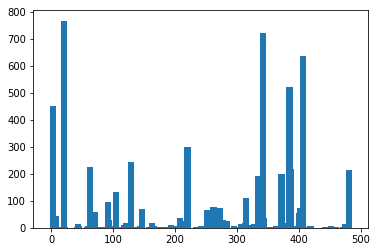

In [77]:
plt.bar(range(483),actual_error_scores_test,10)

In [15]:
# connecting 2 dataframes cust_id and dates data
cust_1000 = pd.read_csv("data-1000customers.csv")
cust_1000 = cust_1000[['client_debtor_number','dates','fv_cost']]
cust_1000 = cust_1000[cust_1000.fv_cost.notnull()]

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
print (df.columns)

Index(['Unnamed: 0', 'fv_cost', 'fv_cost.1', 'fv_cost.2', 'fv_cost.3',
       'fv_cost.4', 'fv_cost.5', 'fv_cost.6', 'fv_cost.7', 'fv_cost.8',
       ...
       'fv_cost.1453', 'fv_cost.1454', 'fv_cost.1455', 'fv_cost.1456',
       'fv_cost.1457', 'fv_cost.1458', 'fv_cost.1459', 'fv_cost.1460',
       'fv_cost.1461', 'cluster_lables'],
      dtype='object', length=1464)


In [17]:
#create new dataframe with 2 columns
df.rename(columns={'Unnamed: 0':'customer_num'},inplace=True)
cust_cluster_num = pd.DataFrame()
cust_cluster_num['client_debtor_number'] = df['customer_num']
cust_cluster_num['cluster_lables'] = df['cluster_lables']
cust_cluster_num = cust_cluster_num.iloc[2:]
print ("number of customers ",len(cust_cluster_num.client_debtor_number.unique()))
print ("length of cust-1000 dataframe ",len(cust_1000.client_debtor_number.unique()))
print ("clust dist ",cust_cluster_num.cluster_lables.describe())
cust_cluster_num.head()

number of customers  847
length of cust-1000 dataframe  1000
clust dist  count    847.000000
mean       5.540732
std        0.647184
min        1.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: cluster_lables, dtype: float64


,client_debtor_number,cluster_lables
2,1009141,5.0
3,1010055,5.0
4,1018494,5.0
5,1020907,6.0
6,1029070,6.0


In [18]:
#df = pd.merge(df1, df2, on=['document_id','item_id'])
#different column names
merged_cust = pd.merge(cust_cluster_num, cust_1000,on=['client_debtor_number'])
print (len(merged_cust))
print (merged_cust.head())

# After merging data since the number of customers reduced from 1000 to 847 in clusters dataset 
# we can see decrease in number of records

290799
  client_debtor_number  cluster_lables       dates  fv_cost
0              7727216             6.0  19/01/2010      0.0
1              7727216             6.0  20/01/2010      0.0
2              7727216             6.0  21/01/2010      0.0
3              7727216             6.0  22/01/2010      0.0
4              7727216             6.0  23/01/2010      0.0


In [19]:
#checking number of customers different to both datasets
data_clust = cust_cluster_num['client_debtor_number'].unique()
data_cust = cust_1000['client_debtor_number'].unique()

print ("number of different customers",len(set(data_clust).difference(set(data_cust))))
# only 347 number of customers match between 2 datasets and 510 are different,adding them
# give 847 customers which are number of customers in 8 clusters dataset

number of different customers 510


In [20]:
for i in range(1,8):
    #cust_clust_i = cust_cluster_num[cust_cluster_num.cluster_lables == i]
    #clust_i = merged_cust[merged_cust.client_debtor_number == cust_cluster_num.client_debtor_number]
    clust_i = merged_cust[merged_cust.cluster_lables == i]
    print (len(clust_i['client_debtor_number'].unique()))
    

0
0
2
0
131
202
2


In [21]:
# sort the dates in ascending
merged_cust['dates'] = pd.to_datetime(merged_cust['dates'],format= '%d/%m/%Y')
merged_cust.sort_values(by='dates',inplace=True)
merged_cust.to_csv("merged_customers.csv")
#run on merged data set for clusters
clust_5 = merged_cust[merged_cust.cluster_lables == 5]
clust_6 = merged_cust[merged_cust.cluster_lables == 6]
#dates is already there no need of having transpose

In [137]:
%%time
# 3 lags for each data point as input to model
lag =  3
# model parameters
num_neurons = 24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
model = Sequential()
model.add(Conv1D(filters=24,batch_size=1, kernel_size=3, strides=3, padding="same",activation='relu',dilation_rate=1, input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(0.2))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(1))
model.add(Dropout(0.2))
# compile
model.compile(loss='mean_absolute_error', optimizer='adam')

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_6.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x['fv_cost'], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x['fv_cost'], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = scalar_train.inverse_transform(trainScore)
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0
Epoch 1/10
 - 7s - loss: 0.2033
Epoch 2/10
 - 7s - loss: 0.1891
Epoch 3/10
 - 6s - loss: 0.1824
Epoch 4/10
 - 6s - loss: 0.1831
Epoch 5/10
 - 6s - loss: 0.1884
Epoch 6/10
 - 6s - loss: 0.1745
Epoch 7/10
 - 7s - loss: 0.1826
Epoch 8/10
 - 7s - loss: 0.1913
Epoch 9/10
 - 6s - loss: 0.1953
Epoch 10/10
 - 6s - loss: 0.1752
7727216  Test RMSE:  0.2553535954198108
customer number  1
Epoch 1/10
 - 5s - loss: 0.3160
Epoch 2/10
 - 5s - loss: 0.2072
Epoch 3/10
 - 5s - loss: 0.2131
Epoch 4/10
 - 5s - loss: 0.2341
Epoch 5/10
 - 5s - loss: 0.1866
Epoch 6/10
 - 5s - loss: 0.2086
Epoch 7/10
 - 5s - loss: 0.1907
Epoch 8/10
 - 5s - loss: 0.2042
Epoch 9/10
 - 5s - loss: 0.1926
Epoch 10/10
 - 5s - loss: 0.2288
7808208  Test RMSE:  1.3064545260056744
customer number  2
Epoch 1/10
 - 6s - loss: 0.1771
Epoch 2/10
 - 6s - loss: 0.1772
Epoch 3/10
 - 6s - loss: 0.1911
Epoch 4/10
 - 6s - loss: 0.1590
Epoch 5/10
 - 6s - loss: 0.1798
Epoch 6/10
 - 6s - loss: 0.1631
Epoch 7/10
 - 6s - loss: 0.15

Epoch 7/10
 - 4s - loss: 0.2008
Epoch 8/10
 - 4s - loss: 0.2125
Epoch 9/10
 - 4s - loss: 0.2112
Epoch 10/10
 - 4s - loss: 0.2021
7925425  Test RMSE:  0.3020156717685844
customer number  22
Epoch 1/10
 - 5s - loss: 0.0827
Epoch 2/10
 - 5s - loss: 0.0830
Epoch 3/10
 - 5s - loss: 0.0821
Epoch 4/10
 - 5s - loss: 0.0683
Epoch 5/10
 - 5s - loss: 0.0745
Epoch 6/10
 - 5s - loss: 0.0799
Epoch 7/10
 - 5s - loss: 0.0716
Epoch 8/10
 - 5s - loss: 0.0794
Epoch 9/10
 - 5s - loss: 0.0787
Epoch 10/10
 - 5s - loss: 0.0813
7932979  Test RMSE:  0.19534159599556503
customer number  23
Epoch 1/10
 - 5s - loss: 0.1638
Epoch 2/10
 - 5s - loss: 0.1611
Epoch 3/10
 - 5s - loss: 0.1526
Epoch 4/10
 - 5s - loss: 0.1506
Epoch 5/10
 - 5s - loss: 0.1596
Epoch 6/10
 - 5s - loss: 0.1680
Epoch 7/10
 - 5s - loss: 0.1523
Epoch 8/10
 - 5s - loss: 0.1485
Epoch 9/10
 - 5s - loss: 0.1337
Epoch 10/10
 - 5s - loss: 0.1623
7937008  Test RMSE:  5.036849094869853
customer number  24
Epoch 1/10
 - 5s - loss: 0.1664
Epoch 2/10
 - 5s 

 - 5s - loss: 0.1415
Epoch 2/10
 - 5s - loss: 0.1195
Epoch 3/10
 - 5s - loss: 0.1296
Epoch 4/10
 - 5s - loss: 0.1307
Epoch 5/10
 - 5s - loss: 0.1573
Epoch 6/10
 - 5s - loss: 0.1367
Epoch 7/10
 - 5s - loss: 0.1529
Epoch 8/10
 - 5s - loss: 0.1655
Epoch 9/10
 - 5s - loss: 0.1380
Epoch 10/10
 - 5s - loss: 0.1491
7984561  Test RMSE:  3.624243840216065
customer number  44
Epoch 1/10
 - 4s - loss: 0.1851
Epoch 2/10
 - 4s - loss: 0.1672
Epoch 3/10
 - 4s - loss: 0.1590
Epoch 4/10
 - 4s - loss: 0.1634
Epoch 5/10
 - 4s - loss: 0.1636
Epoch 6/10
 - 4s - loss: 0.1727
Epoch 7/10
 - 4s - loss: 0.1636
Epoch 8/10
 - 4s - loss: 0.1675
Epoch 9/10
 - 4s - loss: 0.1562
Epoch 10/10
 - 4s - loss: 0.1671
7994532  Test RMSE:  0.46927455830829085
customer number  45
Epoch 1/10
 - 4s - loss: 0.0795
Epoch 2/10
 - 4s - loss: 0.0793
Epoch 3/10
 - 4s - loss: 0.0758
Epoch 4/10
 - 4s - loss: 0.0861
Epoch 5/10
 - 4s - loss: 0.0705
Epoch 6/10
 - 4s - loss: 0.0772
Epoch 7/10
 - 4s - loss: 0.0738
Epoch 8/10
 - 4s - loss: 

 - 4s - loss: 0.0264
Epoch 8/10
 - 4s - loss: 0.0245
Epoch 9/10
 - 4s - loss: 0.0236
Epoch 10/10
 - 4s - loss: 0.0228
8083258  Test RMSE:  0.2232344627000139
customer number  65
Epoch 1/10
 - 4s - loss: 0.1749
Epoch 2/10
 - 4s - loss: 0.1659
Epoch 3/10
 - 4s - loss: 0.1592
Epoch 4/10
 - 4s - loss: 0.1413
Epoch 5/10
 - 4s - loss: 0.1598
Epoch 6/10
 - 4s - loss: 0.1586
Epoch 7/10
 - 4s - loss: 0.1646
Epoch 8/10
 - 4s - loss: 0.1461
Epoch 9/10
 - 4s - loss: 0.1688
Epoch 10/10
 - 5s - loss: 0.1405
8087326  Test RMSE:  1.0755294067811367
customer number  66
Epoch 1/10
 - 5s - loss: 0.1990
Epoch 2/10
 - 4s - loss: 0.1956
Epoch 3/10
 - 4s - loss: 0.1866
Epoch 4/10
 - 4s - loss: 0.1986
Epoch 5/10
 - 4s - loss: 0.1889
Epoch 6/10
 - 4s - loss: 0.1985
Epoch 7/10
 - 4s - loss: 0.2044
Epoch 8/10
 - 4s - loss: 0.2171
Epoch 9/10
 - 4s - loss: 0.2068
Epoch 10/10
 - 4s - loss: 0.2082
8087946  Test RMSE:  0.17307579517364502
customer number  67
Epoch 1/10
 - 4s - loss: 0.0744
Epoch 2/10
 - 4s - loss: 0.

 - 4s - loss: 0.1555
Epoch 2/10
 - 4s - loss: 0.1616
Epoch 3/10
 - 4s - loss: 0.1587
Epoch 4/10
 - 4s - loss: 0.1700
Epoch 5/10
 - 4s - loss: 0.1480
Epoch 6/10
 - 4s - loss: 0.1464
Epoch 7/10
 - 4s - loss: 0.1540
Epoch 8/10
 - 4s - loss: 0.1539
Epoch 9/10
 - 4s - loss: 0.1551
Epoch 10/10
 - 4s - loss: 0.1553
8161178  Test RMSE:  0.2069020328384197
customer number  87
Epoch 1/10
 - 5s - loss: 0.0757
Epoch 2/10
 - 5s - loss: 0.0720
Epoch 3/10
 - 5s - loss: 0.0797
Epoch 4/10
 - 5s - loss: 0.0830
Epoch 5/10
 - 5s - loss: 0.0693
Epoch 6/10
 - 5s - loss: 0.0727
Epoch 7/10
 - 5s - loss: 0.0721
Epoch 8/10
 - 5s - loss: 0.0832
Epoch 9/10
 - 5s - loss: 0.0783
Epoch 10/10
 - 5s - loss: 0.0828
8165580  Test RMSE:  0.21315399115107647
customer number  88
Epoch 1/10
 - 4s - loss: 0.1666
Epoch 2/10
 - 4s - loss: 0.1815
Epoch 3/10
 - 4s - loss: 0.1783
Epoch 4/10
 - 4s - loss: 0.1886
Epoch 5/10
 - 4s - loss: 0.1868
Epoch 6/10
 - 4s - loss: 0.1698
Epoch 7/10
 - 4s - loss: 0.1839
Epoch 8/10
 - 4s - loss:

 - 5s - loss: 0.0306
Epoch 8/10
 - 5s - loss: 0.0371
Epoch 9/10
 - 5s - loss: 0.0392
Epoch 10/10
 - 5s - loss: 0.0385
8276005  Test RMSE:  1.2673443782275384
customer number  108
Epoch 1/10
 - 5s - loss: 0.1787
Epoch 2/10
 - 5s - loss: 0.1566
Epoch 3/10
 - 5s - loss: 0.1752
Epoch 4/10
 - 5s - loss: 0.1827
Epoch 5/10
 - 5s - loss: 0.1794
Epoch 6/10
 - 5s - loss: 0.1969
Epoch 7/10
 - 4s - loss: 0.1644
Epoch 8/10
 - 4s - loss: 0.1747
Epoch 9/10
 - 4s - loss: 0.1624
Epoch 10/10
 - 4s - loss: 0.1797
8276129  Test RMSE:  0.19865981915430436
customer number  109
Epoch 1/10
 - 4s - loss: 0.1655
Epoch 2/10
 - 4s - loss: 0.1536
Epoch 3/10
 - 5s - loss: 0.1679
Epoch 4/10
 - 6s - loss: 0.1823
Epoch 5/10
 - 5s - loss: 0.1687
Epoch 6/10
 - 5s - loss: 0.1690
Epoch 7/10
 - 4s - loss: 0.1414
Epoch 8/10
 - 4s - loss: 0.1969
Epoch 9/10
 - 4s - loss: 0.1726
Epoch 10/10
 - 4s - loss: 0.1572
8304793  Test RMSE:  0.19886632214381106
customer number  110
Epoch 1/10
 - 4s - loss: 0.2074
Epoch 2/10
 - 4s - loss

 - 4s - loss: 0.1594
Epoch 2/10
 - 5s - loss: 0.1735
Epoch 3/10
 - 4s - loss: 0.1428
Epoch 4/10
 - 5s - loss: 0.1487
Epoch 5/10
 - 4s - loss: 0.1765
Epoch 6/10
 - 5s - loss: 0.1586
Epoch 7/10
 - 4s - loss: 0.1639
Epoch 8/10
 - 5s - loss: 0.1754
Epoch 9/10
 - 5s - loss: 0.1575
Epoch 10/10
 - 5s - loss: 0.1621
8453225  Test RMSE:  0.210737896096726
customer number  130
Epoch 1/10
 - 6s - loss: 0.1291
Epoch 2/10
 - 6s - loss: 0.1412
Epoch 3/10
 - 6s - loss: 0.1176
Epoch 4/10
 - 5s - loss: 0.1303
Epoch 5/10
 - 5s - loss: 0.1355
Epoch 6/10
 - 5s - loss: 0.1369
Epoch 7/10
 - 6s - loss: 0.1298
Epoch 8/10
 - 5s - loss: 0.1653
Epoch 9/10
 - 5s - loss: 0.1219
Epoch 10/10
 - 5s - loss: 0.1290
8463239  Test RMSE:  0.2194778255054039
customer number  131
Epoch 1/10
 - 5s - loss: 0.1734
Epoch 2/10
 - 5s - loss: 0.1653
Epoch 3/10
 - 5s - loss: 0.1749
Epoch 4/10
 - 5s - loss: 0.1923
Epoch 5/10
 - 5s - loss: 0.1699
Epoch 6/10
 - 6s - loss: 0.1605
Epoch 7/10
 - 6s - loss: 0.1689
Epoch 8/10
 - 6s - loss:

Epoch 7/10
 - 4s - loss: 0.1181
Epoch 8/10
 - 4s - loss: 0.1270
Epoch 9/10
 - 4s - loss: 0.0978
Epoch 10/10
 - 4s - loss: 0.1132
8561214  Test RMSE:  4.530800638347249
customer number  151
Epoch 1/10
 - 5s - loss: 0.1801
Epoch 2/10
 - 5s - loss: 0.1669
Epoch 3/10
 - 6s - loss: 0.1560
Epoch 4/10
 - 6s - loss: 0.1487
Epoch 5/10
 - 6s - loss: 0.1589
Epoch 6/10
 - 6s - loss: 0.1611
Epoch 7/10
 - 5s - loss: 0.1692
Epoch 8/10
 - 5s - loss: 0.1718
Epoch 9/10
 - 5s - loss: 0.1955
Epoch 10/10
 - 5s - loss: 0.1767
8562016  Test RMSE:  0.19964171554315566
customer number  152
Epoch 1/10
 - 5s - loss: 0.1287
Epoch 2/10
 - 5s - loss: 0.1518
Epoch 3/10
 - 5s - loss: 0.1358
Epoch 4/10
 - 4s - loss: 0.1196
Epoch 5/10
 - 4s - loss: 0.1227
Epoch 6/10
 - 4s - loss: 0.1274
Epoch 7/10
 - 4s - loss: 0.1234
Epoch 8/10
 - 4s - loss: 0.1466
Epoch 9/10
 - 4s - loss: 0.1563
Epoch 10/10
 - 4s - loss: 0.1339
8563926  Test RMSE:  0.2746373731207339
customer number  153
Epoch 1/10
 - 5s - loss: 0.1805
Epoch 2/10
 - 

 - 4s - loss: 0.1381
Epoch 2/10
 - 4s - loss: 0.1495
Epoch 3/10
 - 4s - loss: 0.1672
Epoch 4/10
 - 4s - loss: 0.1378
Epoch 5/10
 - 4s - loss: 0.1409
Epoch 6/10
 - 4s - loss: 0.1471
Epoch 7/10
 - 4s - loss: 0.1526
Epoch 8/10
 - 4s - loss: 0.1259
Epoch 9/10
 - 4s - loss: 0.1444
Epoch 10/10
 - 5s - loss: 0.1396
9337687  Test RMSE:  0.21339788443110533
customer number  173
Epoch 1/10
 - 5s - loss: 0.0493
Epoch 2/10
 - 5s - loss: 0.0534
Epoch 3/10
 - 4s - loss: 0.0465
Epoch 4/10
 - 4s - loss: 0.0593
Epoch 5/10
 - 4s - loss: 0.0552
Epoch 6/10
 - 4s - loss: 0.0512
Epoch 7/10
 - 4s - loss: 0.0524
Epoch 8/10
 - 4s - loss: 0.0543
Epoch 9/10
 - 4s - loss: 0.0522
Epoch 10/10
 - 4s - loss: 0.0467
9337881  Test RMSE:  0.23557936574830868
customer number  174
Epoch 1/10
 - 6s - loss: 0.1803
Epoch 2/10
 - 6s - loss: 0.1659
Epoch 3/10
 - 6s - loss: 0.1614
Epoch 4/10
 - 6s - loss: 0.1672
Epoch 5/10
 - 6s - loss: 0.1589
Epoch 6/10
 - 5s - loss: 0.1492
Epoch 7/10
 - 5s - loss: 0.1617
Epoch 8/10
 - 5s - lo

Epoch 7/10
 - 6s - loss: 0.1492
Epoch 8/10
 - 5s - loss: 0.1560
Epoch 9/10
 - 5s - loss: 0.1536
Epoch 10/10
 - 5s - loss: 0.1548
9783520  Test RMSE:  93.39023313601135
customer number  194
Epoch 1/10
 - 5s - loss: 0.1351
Epoch 2/10
 - 5s - loss: 0.1173
Epoch 3/10
 - 5s - loss: 0.1231
Epoch 4/10
 - 5s - loss: 0.1326
Epoch 5/10
 - 5s - loss: 0.1191
Epoch 6/10
 - 5s - loss: 0.1245
Epoch 7/10
 - 5s - loss: 0.1211
Epoch 8/10
 - 6s - loss: 0.1065
Epoch 9/10
 - 6s - loss: 0.1284
Epoch 10/10
 - 5s - loss: 0.1326
9857915  Test RMSE:  0.22017020313956778
customer number  195
Epoch 1/10
 - 5s - loss: 0.1714
Epoch 2/10
 - 5s - loss: 0.1799
Epoch 3/10
 - 5s - loss: 0.1656
Epoch 4/10
 - 5s - loss: 0.1583
Epoch 5/10
 - 6s - loss: 0.1859
Epoch 6/10
 - 6s - loss: 0.1780
Epoch 7/10
 - 5s - loss: 0.1619
Epoch 8/10
 - 5s - loss: 0.1749
Epoch 9/10
 - 5s - loss: 0.1795
Epoch 10/10
 - 6s - loss: 0.1789
9911561  Test RMSE:  18.201288606193657
customer number  196
Epoch 1/10
 - 4s - loss: 0.0909
Epoch 2/10
 - 

In [22]:
#since the customers doesn't match 
# working on customers Clusters datasets
with zipfile.ZipFile("clusters_timeseries_1000_customer_no_collection_comments.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
part-00000-581ed144-c0f2-45b7-b743-a35fb688f431-c000.csv 2019-01-19 10:38:12     63898832
Extracting all the files
Done!


In [23]:
new_cust_data = pd.read_csv("part-00000-581ed144-c0f2-45b7-b743-a35fb688f431-c000.csv")
new_cust_data = new_cust_data[['client_debtor_number','dates','fv_cost']]
new_cust_data.head()


,client_debtor_number,dates,fv_cost
0,7347391,12/03/2010,0.0
1,7347391,13/03/2010,0.0
2,7347391,14/03/2010,0.0
3,7347391,15/03/2010,0.0
4,7347391,16/03/2010,0.0


In [24]:
merged_data = pd.merge(cust_cluster_num, new_cust_data,on=['client_debtor_number'])
print ("number of different customers",
       len(set(cust_cluster_num['client_debtor_number'].unique()).difference(
           set(new_cust_data['client_debtor_number'].unique()))))
#gives same number of different customers

number of different customers 510


In [25]:
#try with second dataset
with zipfile.ZipFile("clusters_timeseries_1000_customers_original_format.zip", 'r') as zip_ref:
    # printing all the contents of the zip file 
    zip_ref.printdir() 
  
    # extracting all the files 
    print('Extracting all the files') 
    zip_ref.extractall() 
    print('Done!') 

File Name                                             Modified             Size
part-00000-df6d76cc-e9b8-44d0-a160-d097564c22a5-c000.csv 2019-01-19 10:35:02     81297783
Extracting all the files
Done!


In [26]:
new_cust_update = pd.read_csv("part-00000-df6d76cc-e9b8-44d0-a160-d097564c22a5-c000.csv")
new_cust_update = new_cust_update[['client_debtor_number','dates','fv_cost']]
new_cust_update.head()

/Users/anusha/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,client_debtor_number,dates,fv_cost
0,7347391,12/03/2010,0.0
1,7347391,13/03/2010,0.0
2,7347391,14/03/2010,0.0
3,7347391,15/03/2010,0.0
4,7347391,16/03/2010,0.0


In [27]:
print ("number of different customers",
       len(set(cust_cluster_num['client_debtor_number'].unique()).difference(
           set(new_cust_update['client_debtor_number'].unique()))))

number of different customers 510


In [28]:
# sort the dates in ascending
merged_data['dates'] = pd.to_datetime(merged_data['dates'],format= '%d/%m/%Y')
merged_data.sort_values(by='dates',inplace=True)
merged_data.to_csv("merged_customers.csv")
#run on merged data set for clusters
clust_5_data = merged_data[merged_data.cluster_lables == 5]
clust_6_data = merged_data[merged_data.cluster_lables == 6]
clust_5_data.reset_index(drop=True,inplace=True)
clust_6_data.reset_index(drop=True,inplace=True)

In [29]:
clust_6_data

,client_debtor_number,cluster_lables,dates,fv_cost
0,8165580,6.0,2010-01-01,0.000000
1,7811179,6.0,2010-01-01,0.000000
2,8316546,6.0,2010-01-01,0.000000
3,8883440,6.0,2010-01-01,0.000000
4,8220638,6.0,2010-01-01,0.000000
5,8005311,6.0,2010-01-01,0.000000
6,7846738,6.0,2010-01-01,0.000000
7,8276129,6.0,2010-01-01,0.000000
8,9782079,6.0,2010-01-01,0.000000
9,8534632,6.0,2010-01-01,0.000000


In [26]:
def difference(dataset):
    interval=1
    diff = list()
    for i in range(interval, len(dataset)):
        value = (dataset.iloc[i] - dataset.iloc[i - interval])/(1+abs(dataset.iloc[i - interval]))
        diff.append(value)
    return diff

In [36]:
%%time
lag =  3
# model parameters
num_neurons = 50 #24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
dropout_rate =0.2
# instantiate a sequential model
model = Sequential()
model.add(Conv1D(filters=num_neurons,batch_size=1, kernel_size=3, 
                 strides=3, 
                 padding="same",activation='selu',dilation_rate=1, 
                 input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
#model.add(Dense(16,activation='linear'))
#model.add(Dense(18,activation='exponential'))
model.add(Dense(1,activation='selu'))
from keras import optimizers
adam = optimizers.Adam(lr=0.01, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_6_data.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    
    #diff_train = np.array(difference(train_x['fv_cost']))
    #diff_test = np.array(difference(test_x['fv_cost']))
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(train_x['fv_cost'], 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(test_x['fv_cost'], 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    #yhat_act_test = [scalar_test.inverse_transform(testPredict)[i-lag]+diff_test[i]
    #             for i in range(lag,len(diff_test))]
    yhat_act_test = scalar_test.inverse_transform(testPredict)
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    #yhat_act_train = [scalar_train.inverse_transform(trainPredict)[i-lag]+diff_train[i]
    #              for i in range(lag,len(diff_train))]
    yhat_act_train = scalar_train.inverse_transform(trainPredict)
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0


/Users/anusha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Epoch 1/10
 - 12s - loss: 0.0296
Epoch 2/10
 - 12s - loss: 0.0497
Epoch 3/10
 - 12s - loss: 0.0339
Epoch 4/10
 - 12s - loss: 0.0205
Epoch 5/10
 - 13s - loss: 0.0112
Epoch 6/10
 - 13s - loss: 0.0102
Epoch 7/10
 - 12s - loss: 0.0103
Epoch 8/10
 - 18s - loss: 0.0104
Epoch 9/10
 - 16s - loss: 0.0106
Epoch 10/10
 - 14s - loss: 0.0108
7727216  Test RMSE:  0.16805752585376296
customer number  1
Epoch 1/10
 - 14s - loss: 0.0395
Epoch 2/10
 - 14s - loss: 0.0211
Epoch 3/10
 - 15s - loss: 0.0160
Epoch 4/10
 - 20s - loss: 0.0131
Epoch 5/10
 - 22s - loss: 0.0125
Epoch 6/10
 - 23s - loss: 0.0117
Epoch 7/10
 - 32s - loss: 0.0120
Epoch 8/10
 - 30s - loss: 0.0100
Epoch 9/10
 - 28s - loss: 0.0100
Epoch 10/10
 - 24s - loss: 0.0103
7808208  Test RMSE:  1.1011103835033615
customer number  2
Epoch 1/10
 - 38s - loss: 0.0194
Epoch 2/10
 - 48s - loss: 0.0055
Epoch 3/10
 - 46s - loss: 0.0045
Epoch 4/10
 - 50s - loss: 0.0040
Epoch 5/10
 - 45s - loss: 0.0041
Epoch 6/10
 - 14s - loss: 0.0037
Epoch 7/10
 - 10s - l

 - 9s - loss: 0.0091
Epoch 2/10
 - 9s - loss: 0.0082
Epoch 3/10
 - 9s - loss: 0.0093
Epoch 4/10
 - 9s - loss: 0.0073
Epoch 5/10
 - 9s - loss: 0.0084
Epoch 6/10
 - 9s - loss: 0.0079
Epoch 7/10
 - 9s - loss: 0.0077
Epoch 8/10
 - 9s - loss: 0.0073
Epoch 9/10
 - 9s - loss: 0.0072
Epoch 10/10
 - 9s - loss: 0.0071
7925425  Test RMSE:  0.07670930153166629
customer number  22
Epoch 1/10
 - 11s - loss: 0.0133
Epoch 2/10
 - 11s - loss: 0.0108
Epoch 3/10
 - 11s - loss: 0.0098
Epoch 4/10
 - 11s - loss: 0.0095
Epoch 5/10
 - 11s - loss: 0.0089
Epoch 6/10
 - 11s - loss: 0.0089
Epoch 7/10
 - 11s - loss: 0.0084
Epoch 8/10
 - 11s - loss: 0.0091
Epoch 9/10
 - 11s - loss: 0.0086
Epoch 10/10
 - 11s - loss: 0.0091
7932979  Test RMSE:  0.11829524477964332
customer number  23
Epoch 1/10
 - 11s - loss: 0.0098
Epoch 2/10
 - 11s - loss: 0.0067
Epoch 3/10
 - 11s - loss: 0.0061
Epoch 4/10
 - 11s - loss: 0.0062
Epoch 5/10
 - 11s - loss: 0.0063
Epoch 6/10
 - 11s - loss: 0.0065
Epoch 7/10
 - 10s - loss: 0.0060
Epoch 

Epoch 2/10
 - 11s - loss: 0.0030
Epoch 3/10
 - 11s - loss: 0.0026
Epoch 4/10
 - 11s - loss: 0.0027
Epoch 5/10
 - 11s - loss: 0.0024
Epoch 6/10
 - 11s - loss: 0.0022
Epoch 7/10
 - 11s - loss: 0.0027
Epoch 8/10
 - 11s - loss: 0.0026
Epoch 9/10
 - 11s - loss: 0.0023
Epoch 10/10
 - 11s - loss: 0.0024
7984472  Test RMSE:  3.742705331949728
customer number  43
Epoch 1/10
 - 11s - loss: 0.0087
Epoch 2/10
 - 11s - loss: 0.0079
Epoch 3/10
 - 11s - loss: 0.0078
Epoch 4/10
 - 11s - loss: 0.0080
Epoch 5/10
 - 11s - loss: 0.0084
Epoch 6/10
 - 11s - loss: 0.0076
Epoch 7/10
 - 11s - loss: 0.0073
Epoch 8/10
 - 11s - loss: 0.0077
Epoch 9/10
 - 11s - loss: 0.0081
Epoch 10/10
 - 11s - loss: 0.0074
7984561  Test RMSE:  2.0650584986929
customer number  44
Epoch 1/10
 - 11s - loss: 0.0063
Epoch 2/10
 - 11s - loss: 0.0038
Epoch 3/10
 - 11s - loss: 0.0033
Epoch 4/10
 - 11s - loss: 0.0026
Epoch 5/10
 - 11s - loss: 0.0029
Epoch 6/10
 - 11s - loss: 0.0023
Epoch 7/10
 - 11s - loss: 0.0026
Epoch 8/10
 - 11s - loss

 - 10s - loss: 0.0069
Epoch 2/10
 - 10s - loss: 0.0073
Epoch 3/10
 - 10s - loss: 0.0067
Epoch 4/10
 - 10s - loss: 0.0059
Epoch 5/10
 - 9s - loss: 0.0065
Epoch 6/10
 - 10s - loss: 0.0070
Epoch 7/10
 - 10s - loss: 0.0074
Epoch 8/10
 - 10s - loss: 0.0068
Epoch 9/10
 - 10s - loss: 0.0067
Epoch 10/10
 - 10s - loss: 0.0072
8076227  Test RMSE:  0.022971408228000617
customer number  64
Epoch 1/10
 - 9s - loss: 0.0047
Epoch 2/10
 - 10s - loss: 0.0043
Epoch 3/10
 - 11s - loss: 0.0040
Epoch 4/10
 - 10s - loss: 0.0041
Epoch 5/10
 - 10s - loss: 0.0041
Epoch 6/10
 - 10s - loss: 0.0043
Epoch 7/10
 - 10s - loss: 0.0039
Epoch 8/10
 - 10s - loss: 0.0042
Epoch 9/10
 - 10s - loss: 0.0037
Epoch 10/10
 - 10s - loss: 0.0040
8083258  Test RMSE:  0.0426945189274799
customer number  65
Epoch 1/10
 - 13s - loss: 0.0066
Epoch 2/10
 - 12s - loss: 0.0067
Epoch 3/10
 - 13s - loss: 0.0062
Epoch 4/10
 - 13s - loss: 0.0062
Epoch 5/10
 - 12s - loss: 0.0063
Epoch 6/10
 - 12s - loss: 0.0060
Epoch 7/10
 - 13s - loss: 0.006

 - 12s - loss: 0.0066
Epoch 2/10
 - 12s - loss: 0.0061
Epoch 3/10
 - 12s - loss: 0.0061
Epoch 4/10
 - 12s - loss: 0.0059
Epoch 5/10
 - 12s - loss: 0.0064
Epoch 6/10
 - 12s - loss: 0.0063
Epoch 7/10
 - 12s - loss: 0.0058
Epoch 8/10
 - 12s - loss: 0.0059
Epoch 9/10
 - 12s - loss: 0.0061
Epoch 10/10
 - 12s - loss: 0.0065
8152519  Test RMSE:  0.05218703365266262
customer number  85
Epoch 1/10
 - 12s - loss: 0.0057
Epoch 2/10
 - 12s - loss: 0.0059
Epoch 3/10
 - 12s - loss: 0.0056
Epoch 4/10
 - 12s - loss: 0.0057
Epoch 5/10
 - 12s - loss: 0.0055
Epoch 6/10
 - 12s - loss: 0.0056
Epoch 7/10
 - 12s - loss: 0.0060
Epoch 8/10
 - 14s - loss: 0.0056
Epoch 9/10
 - 14s - loss: 0.0062
Epoch 10/10
 - 14s - loss: 0.0057
8153760  Test RMSE:  0.05049796365985752
customer number  86
Epoch 1/10
 - 12s - loss: 0.0063
Epoch 2/10
 - 12s - loss: 0.0070
Epoch 3/10
 - 12s - loss: 0.0062
Epoch 4/10
 - 12s - loss: 0.0066
Epoch 5/10
 - 12s - loss: 0.0067
Epoch 6/10
 - 12s - loss: 0.0063
Epoch 7/10
 - 12s - loss: 0.0

 - 13s - loss: 0.0086
Epoch 2/10
 - 14s - loss: 0.0081
Epoch 3/10
 - 14s - loss: 0.0078
Epoch 4/10
 - 14s - loss: 0.0077
Epoch 5/10
 - 14s - loss: 0.0074
Epoch 6/10
 - 14s - loss: 0.0079
Epoch 7/10
 - 13s - loss: 0.0085
Epoch 8/10
 - 14s - loss: 0.0083
Epoch 9/10
 - 14s - loss: 0.0089
Epoch 10/10
 - 13s - loss: 0.0080
8269890  Test RMSE:  0.041750497552990214
customer number  106
Epoch 1/10
 - 14s - loss: 0.0035
Epoch 2/10
 - 14s - loss: 0.0033
Epoch 3/10
 - 14s - loss: 0.0032
Epoch 4/10
 - 14s - loss: 0.0036
Epoch 5/10
 - 14s - loss: 0.0032
Epoch 6/10
 - 14s - loss: 0.0030
Epoch 7/10
 - 14s - loss: 0.0030
Epoch 8/10
 - 14s - loss: 0.0034
Epoch 9/10
 - 14s - loss: 0.0033
Epoch 10/10
 - 13s - loss: 0.0031
8275483  Test RMSE:  92.58160171018699
customer number  107
Epoch 1/10
 - 13s - loss: 0.0060
Epoch 2/10
 - 13s - loss: 0.0056
Epoch 3/10
 - 13s - loss: 0.0058
Epoch 4/10
 - 13s - loss: 0.0058
Epoch 5/10
 - 13s - loss: 0.0057
Epoch 6/10
 - 13s - loss: 0.0059
Epoch 7/10
 - 13s - loss: 0.

8393427  Test RMSE:  200.95667270467158
customer number  126
Epoch 1/10
 - 11s - loss: 0.0072
Epoch 2/10
 - 11s - loss: 0.0060
Epoch 3/10
 - 11s - loss: 0.0066
Epoch 4/10
 - 11s - loss: 0.0064
Epoch 5/10
 - 11s - loss: 0.0065
Epoch 6/10
 - 11s - loss: 0.0064
Epoch 7/10
 - 11s - loss: 0.0058
Epoch 8/10
 - 11s - loss: 0.0059
Epoch 9/10
 - 11s - loss: 0.0065
Epoch 10/10
 - 11s - loss: 0.0068
8395411  Test RMSE:  257.40178624018733
customer number  127
Epoch 1/10
 - 10s - loss: 0.0099
Epoch 2/10
 - 11s - loss: 0.0077
Epoch 3/10
 - 10s - loss: 0.0072
Epoch 4/10
 - 10s - loss: 0.0082
Epoch 5/10
 - 11s - loss: 0.0068
Epoch 6/10
 - 10s - loss: 0.0077
Epoch 7/10
 - 11s - loss: 0.0083
Epoch 8/10
 - 10s - loss: 0.0067
Epoch 9/10
 - 10s - loss: 0.0071
Epoch 10/10
 - 10s - loss: 0.0072
8395977  Test RMSE:  0.001146331168548643
customer number  128
Epoch 1/10
 - 10s - loss: 0.0135
Epoch 2/10
 - 10s - loss: 0.0111
Epoch 3/10
 - 10s - loss: 0.0124
Epoch 4/10
 - 10s - loss: 0.0111
Epoch 5/10
 - 10s - l

Epoch 10/10
 - 13s - loss: 0.0058
8533725  Test RMSE:  0.030991748841906062
customer number  147
Epoch 1/10
 - 12s - loss: 0.0049
Epoch 2/10
 - 12s - loss: 0.0044
Epoch 3/10
 - 12s - loss: 0.0042
Epoch 4/10
 - 12s - loss: 0.0045
Epoch 5/10
 - 12s - loss: 0.0040
Epoch 6/10
 - 11s - loss: 0.0043
Epoch 7/10
 - 11s - loss: 0.0040
Epoch 8/10
 - 11s - loss: 0.0041
Epoch 9/10
 - 11s - loss: 0.0041
Epoch 10/10
 - 11s - loss: 0.0040
8534632  Test RMSE:  0.03981166500142934
customer number  148
Epoch 1/10
 - 10s - loss: 0.0102
Epoch 2/10
 - 10s - loss: 0.0087
Epoch 3/10
 - 10s - loss: 0.0086
Epoch 4/10
 - 10s - loss: 0.0084
Epoch 5/10
 - 10s - loss: 0.0086
Epoch 6/10
 - 10s - loss: 0.0077
Epoch 7/10
 - 10s - loss: 0.0083
Epoch 8/10
 - 10s - loss: 0.0094
Epoch 9/10
 - 10s - loss: 0.0080
Epoch 10/10
 - 10s - loss: 0.0078
8536163  Test RMSE:  0.03742696847390515
customer number  149
Epoch 1/10
 - 12s - loss: 0.0064
Epoch 2/10
 - 12s - loss: 0.0058
Epoch 3/10
 - 12s - loss: 0.0061
Epoch 4/10
 - 12s 

 - 10s - loss: 0.0070
Epoch 9/10
 - 10s - loss: 0.0057
Epoch 10/10
 - 10s - loss: 0.0060
9055525  Test RMSE:  0.01800252412285864
customer number  168
Epoch 1/10
 - 12s - loss: 0.0054
Epoch 2/10
 - 12s - loss: 0.0061
Epoch 3/10
 - 12s - loss: 0.0057
Epoch 4/10
 - 12s - loss: 0.0052
Epoch 5/10
 - 12s - loss: 0.0058
Epoch 6/10
 - 12s - loss: 0.0052
Epoch 7/10
 - 12s - loss: 0.0055
Epoch 8/10
 - 12s - loss: 0.0051
Epoch 9/10
 - 12s - loss: 0.0055
Epoch 10/10
 - 12s - loss: 0.0060
9057226  Test RMSE:  0.016507465397163183
customer number  169
Epoch 1/10
 - 11s - loss: 0.0041
Epoch 2/10
 - 11s - loss: 0.0043
Epoch 3/10
 - 11s - loss: 0.0043
Epoch 4/10
 - 11s - loss: 0.0042
Epoch 5/10
 - 11s - loss: 0.0040
Epoch 6/10
 - 11s - loss: 0.0037
Epoch 7/10
 - 11s - loss: 0.0040
Epoch 8/10
 - 12s - loss: 0.0040
Epoch 9/10
 - 12s - loss: 0.0042
Epoch 10/10
 - 11s - loss: 0.0040
9061606  Test RMSE:  0.035243850737828854
customer number  170
Epoch 1/10
 - 12s - loss: 0.0055
Epoch 2/10
 - 12s - loss: 0.

Epoch 7/10
 - 10s - loss: 0.0064
Epoch 8/10
 - 10s - loss: 0.0064
Epoch 9/10
 - 10s - loss: 0.0062
Epoch 10/10
 - 10s - loss: 0.0065
9715797  Test RMSE:  0.017509748766241208
customer number  189
Epoch 1/10
 - 11s - loss: 0.0063
Epoch 2/10
 - 11s - loss: 0.0060
Epoch 3/10
 - 12s - loss: 0.0057
Epoch 4/10
 - 11s - loss: 0.0057
Epoch 5/10
 - 11s - loss: 0.0059
Epoch 6/10
 - 11s - loss: 0.0061
Epoch 7/10
 - 11s - loss: 0.0054
Epoch 8/10
 - 11s - loss: 0.0055
Epoch 9/10
 - 11s - loss: 0.0055
Epoch 10/10
 - 11s - loss: 0.0056
9724478  Test RMSE:  1.9370833890246035
customer number  190
Epoch 1/10
 - 10s - loss: 0.0054
Epoch 2/10
 - 10s - loss: 0.0052
Epoch 3/10
 - 10s - loss: 0.0051
Epoch 4/10
 - 10s - loss: 0.0055
Epoch 5/10
 - 9s - loss: 0.0051
Epoch 6/10
 - 10s - loss: 0.0054
Epoch 7/10
 - 10s - loss: 0.0048
Epoch 8/10
 - 10s - loss: 0.0052
Epoch 9/10
 - 9s - loss: 0.0050
Epoch 10/10
 - 9s - loss: 0.0051
9737367  Test RMSE:  0.023918894141723285
customer number  191
Epoch 1/10
 - 12s - l

<Container object of 202 artists>

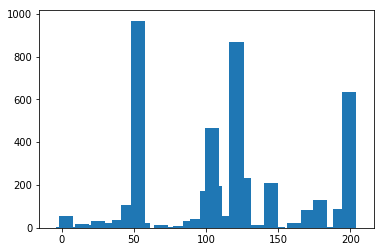

In [151]:
plt.bar(range(202),actual_error_scores_test,10)

In [ ]:
plt.bar(range(202),test_rmse,10)

<Container object of 202 artists>

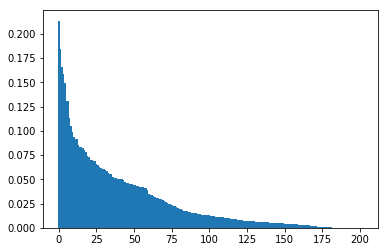

In [37]:
plt.bar(range(202),sorted(test_rmse,reverse=True),1)

In [33]:
hist, bin_edges = np.histogram(test_rmse, bins=50)
df_binedges = pd.DataFrame()

#create dataframe with bin values
for i in range(len(hist)):
    df_binedges.at[i,'binedge_1'] = float(bin_edges[i])
    df_binedges.at[i,'binedge_2'] = float(bin_edges[i+1])
    df_binedges.at[i,'count'] = hist[i]

df_binedges

,binedge_1,binedge_2,count
0,0.000756,0.005688,71.0
1,0.005688,0.010620,22.0
2,0.010620,0.015552,20.0
3,0.015552,0.020484,12.0
4,0.020484,0.025415,7.0
5,0.025415,0.030347,6.0
6,0.030347,0.035279,10.0
7,0.035279,0.040211,4.0
8,0.040211,0.045143,3.0
9,0.045143,0.050075,5.0


In [ ]:
%%time
lag =  3
# model parameters
num_neurons = 50 #24
batch_size = 1  # this forces the lstm to step through each time-step one at a time
batch_input_shape=(batch_size, 1, lag)
dropout_rate =0.2
# instantiate a sequential model
model = Sequential()
model.add(Conv1D(filters=num_neurons,batch_size=1, kernel_size=3, 
                 strides=3, 
                 padding="same",activation='linear',dilation_rate=1, 
                 input_shape=(1, 3),data_format='channels_first'))
model.add(MaxPooling1D(pool_size=3,strides=3, padding="same"))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=num_neurons, 
              batch_input_shape=batch_input_shape, return_sequences=False,# as we only want last hidden output 
              stateful=True))
model.add(Dense(16,activation='linear'))
#model.add(Dense(18,activation='linear'))
model.add(Dense(1,activation='linear'))
from keras import optimizers
adam = optimizers.Adam(lr=0.01, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

#run the model on merged clusters data
i=0
train_rmse =[]
test_rmse = []
actual_train_rmse = []
actual_error_scores_test = list()


for cust_id, cust_data in clust_5_data.groupby('client_debtor_number'):
    print ("customer number ",i)
    i=i+1
    #train_x = cust_data[cust_data['dates'].str.contains('/2018') == False]
    #test_x = cust_data[cust_data['dates'].str.contains('/2018') == True]
    train_x = cust_data[cust_data['dates'].dt.year != 2018]
    test_x = cust_data[cust_data['dates'].dt.year == 2018]
    print ("length of train_x ",len(train_x))
    print ("length of test_x ",len(test_x))
    diff_train = np.array(difference(train_x['fv_cost']))
    print ("diff train done")
    diff_test = np.array(difference(test_x['fv_cost']))
    print ("length of diff train ", len(diff_train))
    print ("length of diff test ", len(diff_test))
    print ("diff train 0 ",diff_train[0])
    print ("diff train 1 ", diff_train[0])
    train_x_cust,train_y_cust, scalar_train = prepare_training_data(diff_train, 3)
    test_x_cust,test_y_cust,scalar_test = prepare_training_data(diff_test, 3)  
    model.fit(train_x_cust, train_y_cust, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
    # input size should be divisible by batch size for stateful LSTM
    trainScore = model.evaluate(train_x_cust, train_y_cust, batch_size=1, verbose=2)
    #print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(test_x_cust, test_y_cust, batch_size=1, verbose=2)
    #print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
    #print('unscaled test score %f MSE' %(scaler.inverse_transform(testScore)))
    train_rmse.append(trainScore)
    test_rmse.append(testScore)
    # generate predictions for training
    trainPredict = model.predict(train_x_cust,batch_size=1)
    testPredict = model.predict(test_x_cust,batch_size=1)
    yhat_act_test = [scalar_test.inverse_transform(testPredict)[i-lag]+diff_test[i]
                 for i in range(lag,len(diff_test))]
    # report performance
    rmse_test = sqrt(mean_squared_error(test_x.fv_cost[-(len(yhat_act_test)):], yhat_act_test))
    print(cust_id," Test RMSE: ",rmse_test)
    actual_error_scores_test.append(rmse_test)
    yhat_act_train = [scalar_train.inverse_transform(trainPredict)[i-lag]+diff_train[i]
                  for i in range(lag,len(diff_train))]
    rmse_train = sqrt(mean_squared_error(train_x.fv_cost[-(len(yhat_act_train)):],yhat_act_train))
    actual_train_rmse.append(rmse_train)
    # write predictions into csv
    result_prediction = pd.DataFrame()#, original_fv : test_y_cust, prediction_fv :testPredict})
    #result_prediction['dates'] = test_x['dates']
    result_prediction['original_fv_scaled'] = test_y_cust
    result_prediction['prediction_scaled'] = testPredict
    result_prediction['prediction_actual'] = yhat_act_test
    result_prediction['fv_actual'] = test_x.fv_cost[-(len(yhat_act_test)):]
    #result_prediction.to_csv("predictions_1000_customers/predictions_for_client_"+str(cust_id)+".csv")
    model.reset_states()

customer number  0
length of train_x  1046
length of test_x  70
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
iteration  66
iteration  67
iterati

iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
iteration  900
iteration  901
iteration  902
iteration  903
iteration  904
iteration  905
iteration  906
iteration  907
iteration  908
iteration  909
iteration  910
iteration  911
iteration  912
iteration  913
iteration  914
iteration  915
iteration  916
iteration  917
iteration  918
iteration  919
iteration  920
iteration  921
iteration  922
iteration  923
iteration  924
iteration  925
iteration  926
iteration  927
iteration  928
iteration  929
iteration  930
iteration  931
iteration  932
iteration  933
iteration  934
iteration  935
iteration  936
iteration  937
iteration 

iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration  53
iteration  54
iteration  55
iteration  56
iteration  57
iteration  58
iteration  59
iteration  60
iteration  61
iteration  62
iteration  63
iteration  64
iteration  65
length of diff train  893
length of diff test  65
diff train 0  0.0
diff train 1  0.0
Epoch 1/10
 - 10s - loss: 0.0986
Epoch 2/10
 - 9s - 

iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration 

iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration 

iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration 

iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration 

iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration 

iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
diff train done
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
iteration  45
iteration  46
iteration  47
iteration  48
iteration  49
iteration  50
iteration  51
iteration  52
iteration 

iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
iteration  900
iteration  901
iteration  902
iteration  903
iteration  904
iteration  905
iteration  906
iteration  907
iteration  908
iteration  909
iteration  910
iteration  911
iteration  912
iteration  913
iteration  914
iteration 

iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration 

iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration 

iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration 

iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration 

iteration  632
iteration  633
iteration  634
iteration  635
iteration  636
iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration 

iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration 

iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration 

iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration 

iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration 

iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration 

iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration 

iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration 

iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
diff train done
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  1

iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
diff train done
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26

iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration 

iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration 

iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
iteration  900
iteration  901
iteration  902
iteration  903
iteration  904
iteration 

iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration 

iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration 

iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration 

iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration 

iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration 

iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration 

iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration 

iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration 

iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration 

iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration 

iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration 

iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration 

iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration 

iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration 

iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration 

iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration 

iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
diff train

iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration 

iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
diff train done
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  1

iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration  890
iteration  891
iteration  892
iteration  893
iteration  894
iteration  895
iteration  896
iteration  897
iteration  898
iteration  899
iteration  900
iteration  901
iteration  902
iteration  903
iteration  904
iteration  905
iteration  906
iteration  907
iteration  908
iteration  909
iteration  910
iteration  911
iteration  912
iteration  913
iteration 

iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration 

iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration 

iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration  873
iteration  874
iteration  875
iteration  876
iteration  877
iteration  878
iteration  879
iteration  880
iteration  881
iteration  882
iteration  883
iteration  884
iteration  885
iteration  886
iteration  887
iteration  888
iteration  889
iteration 

iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration 

iteration  525
iteration  526
iteration  527
iteration  528
iteration  529
iteration  530
iteration  531
iteration  532
iteration  533
iteration  534
iteration  535
iteration  536
iteration  537
iteration  538
iteration  539
iteration  540
iteration  541
iteration  542
iteration  543
iteration  544
iteration  545
iteration  546
iteration  547
iteration  548
iteration  549
iteration  550
iteration  551
iteration  552
iteration  553
iteration  554
iteration  555
iteration  556
iteration  557
iteration  558
iteration  559
iteration  560
iteration  561
iteration  562
iteration  563
iteration  564
iteration  565
iteration  566
iteration  567
iteration  568
iteration  569
iteration  570
iteration  571
iteration  572
iteration  573
iteration  574
iteration  575
iteration  576
iteration  577
iteration  578
iteration  579
iteration  580
iteration  581
iteration  582
iteration  583
iteration  584
iteration  585
iteration  586
iteration  587
iteration  588
iteration  589
iteration  590
iteration 

iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration 

iteration  584
iteration  585
iteration  586
iteration  587
iteration  588
iteration  589
iteration  590
iteration  591
iteration  592
iteration  593
iteration  594
iteration  595
iteration  596
iteration  597
iteration  598
iteration  599
iteration  600
iteration  601
iteration  602
iteration  603
iteration  604
iteration  605
iteration  606
iteration  607
iteration  608
iteration  609
iteration  610
iteration  611
iteration  612
iteration  613
iteration  614
iteration  615
iteration  616
iteration  617
iteration  618
iteration  619
iteration  620
iteration  621
iteration  622
iteration  623
iteration  624
iteration  625
iteration  626
iteration  627
iteration  628
iteration  629
iteration  630
iteration  631
iteration  632
iteration  633
iteration  634
iteration  635
iteration  636
iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration 

 - 11s - loss: 0.0053
Epoch 3/10
 - 11s - loss: 0.0052
Epoch 4/10
 - 11s - loss: 0.0053
Epoch 5/10
 - 11s - loss: 0.0053
Epoch 6/10
 - 11s - loss: 0.0053
Epoch 7/10
 - 11s - loss: 0.0053
Epoch 8/10
 - 11s - loss: 0.0053
Epoch 9/10
 - 10s - loss: 0.0053
Epoch 10/10
 - 10s - loss: 0.0053
8193312  Test RMSE:  101.50878509657171
customer number  53
length of train_x  995
length of test_x  119
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration  42
iteration  43
iteration  44
i

iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration 

iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration 

iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration 

iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration 

iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration 

iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration 

iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration  849
iteration  850
iteration  851
iteration  852
iteration  853
iteration  854
iteration  855
iteration  856
iteration  857
iteration  858
iteration  859
iteration  860
iteration  861
iteration  862
iteration  863
iteration  864
iteration  865
iteration  866
iteration  867
iteration  868
iteration  869
iteration  870
iteration  871
iteration  872
iteration 

iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration 

iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration 

iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration 

iteration  545
iteration  546
iteration  547
iteration  548
iteration  549
iteration  550
iteration  551
iteration  552
iteration  553
iteration  554
iteration  555
iteration  556
iteration  557
iteration  558
iteration  559
iteration  560
iteration  561
iteration  562
iteration  563
iteration  564
iteration  565
iteration  566
iteration  567
iteration  568
iteration  569
iteration  570
iteration  571
iteration  572
iteration  573
iteration  574
iteration  575
iteration  576
iteration  577
iteration  578
iteration  579
iteration  580
iteration  581
iteration  582
iteration  583
iteration  584
iteration  585
iteration  586
iteration  587
iteration  588
iteration  589
iteration  590
iteration  591
iteration  592
iteration  593
iteration  594
iteration  595
iteration  596
iteration  597
iteration  598
iteration  599
iteration  600
iteration  601
iteration  602
iteration  603
iteration  604
iteration  605
iteration  606
iteration  607
iteration  608
iteration  609
iteration  610
iteration 

 - 15s - loss: 0.0258
Epoch 2/10
 - 14s - loss: 0.0191
Epoch 3/10
 - 15s - loss: 0.0190
Epoch 4/10
 - 14s - loss: 0.0190
Epoch 5/10
 - 14s - loss: 0.0191
Epoch 6/10
 - 14s - loss: 0.0191
Epoch 7/10
 - 14s - loss: 0.0191
Epoch 8/10
 - 14s - loss: 0.0191
Epoch 9/10
 - 14s - loss: 0.0192
Epoch 10/10
 - 14s - loss: 0.0190
8227322  Test RMSE:  1.3627518309722493
customer number  64
length of train_x  846
length of test_x  110
iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30
iteration  31
iteration  32
iteration  33
iteration  34
iteration  35
iteration  36
iteration  37
iteration  38
iteration  39
iteration  40
iteration  41
iteration 

iteration  556
iteration  557
iteration  558
iteration  559
iteration  560
iteration  561
iteration  562
iteration  563
iteration  564
iteration  565
iteration  566
iteration  567
iteration  568
iteration  569
iteration  570
iteration  571
iteration  572
iteration  573
iteration  574
iteration  575
iteration  576
iteration  577
iteration  578
iteration  579
iteration  580
iteration  581
iteration  582
iteration  583
iteration  584
iteration  585
iteration  586
iteration  587
iteration  588
iteration  589
iteration  590
iteration  591
iteration  592
iteration  593
iteration  594
iteration  595
iteration  596
iteration  597
iteration  598
iteration  599
iteration  600
iteration  601
iteration  602
iteration  603
iteration  604
iteration  605
iteration  606
iteration  607
iteration  608
iteration  609
iteration  610
iteration  611
iteration  612
iteration  613
iteration  614
iteration  615
iteration  616
iteration  617
iteration  618
iteration  619
iteration  620
iteration  621
iteration 

iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration 

iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration 

iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration 

iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration  821
iteration  822
iteration  823
iteration  824
iteration  825
iteration  826
iteration  827
iteration  828
iteration  829
iteration  830
iteration  831
iteration  832
iteration  833
iteration  834
iteration  835
iteration  836
iteration  837
iteration  838
iteration  839
iteration  840
iteration  841
iteration  842
iteration  843
iteration  844
iteration  845
iteration  846
iteration  847
iteration  848
iteration 

iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration 

iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration  733
iteration  734
iteration  735
iteration  736
iteration  737
iteration  738
iteration  739
iteration  740
iteration  741
iteration  742
iteration  743
iteration  744
iteration  745
iteration  746
iteration  747
iteration  748
iteration  749
iteration  750
iteration  751
iteration  752
iteration  753
iteration  754
iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration 

iteration  634
iteration  635
iteration  636
iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration 

iteration  755
iteration  756
iteration  757
iteration  758
iteration  759
iteration  760
iteration  761
iteration  762
iteration  763
iteration  764
iteration  765
iteration  766
iteration  767
iteration  768
iteration  769
iteration  770
iteration  771
iteration  772
iteration  773
iteration  774
iteration  775
iteration  776
iteration  777
iteration  778
iteration  779
iteration  780
iteration  781
iteration  782
iteration  783
iteration  784
iteration  785
iteration  786
iteration  787
iteration  788
iteration  789
iteration  790
iteration  791
iteration  792
iteration  793
iteration  794
iteration  795
iteration  796
iteration  797
iteration  798
iteration  799
iteration  800
iteration  801
iteration  802
iteration  803
iteration  804
iteration  805
iteration  806
iteration  807
iteration  808
iteration  809
iteration  810
iteration  811
iteration  812
iteration  813
iteration  814
iteration  815
iteration  816
iteration  817
iteration  818
iteration  819
iteration  820
iteration 

iteration  622
iteration  623
iteration  624
iteration  625
iteration  626
iteration  627
iteration  628
iteration  629
iteration  630
iteration  631
iteration  632
iteration  633
iteration  634
iteration  635
iteration  636
iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration 

iteration  637
iteration  638
iteration  639
iteration  640
iteration  641
iteration  642
iteration  643
iteration  644
iteration  645
iteration  646
iteration  647
iteration  648
iteration  649
iteration  650
iteration  651
iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration 

iteration  652
iteration  653
iteration  654
iteration  655
iteration  656
iteration  657
iteration  658
iteration  659
iteration  660
iteration  661
iteration  662
iteration  663
iteration  664
iteration  665
iteration  666
iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration 

iteration  667
iteration  668
iteration  669
iteration  670
iteration  671
iteration  672
iteration  673
iteration  674
iteration  675
iteration  676
iteration  677
iteration  678
iteration  679
iteration  680
iteration  681
iteration  682
iteration  683
iteration  684
iteration  685
iteration  686
iteration  687
iteration  688
iteration  689
iteration  690
iteration  691
iteration  692
iteration  693
iteration  694
iteration  695
iteration  696
iteration  697
iteration  698
iteration  699
iteration  700
iteration  701
iteration  702
iteration  703
iteration  704
iteration  705
iteration  706
iteration  707
iteration  708
iteration  709
iteration  710
iteration  711
iteration  712
iteration  713
iteration  714
iteration  715
iteration  716
iteration  717
iteration  718
iteration  719
iteration  720
iteration  721
iteration  722
iteration  723
iteration  724
iteration  725
iteration  726
iteration  727
iteration  728
iteration  729
iteration  730
iteration  731
iteration  732
iteration 

<Container object of 131 artists>

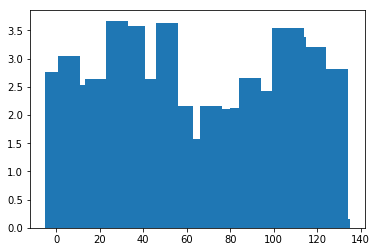

In [216]:
plt.bar(range(131),test_rmse,10)

<Container object of 131 artists>

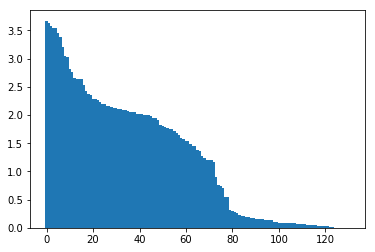

In [217]:
plt.bar(range(131),sorted(test_rmse,reverse=True),1)

In [187]:
import numpy as np
#bins = [0, 0.8]
#hist, bin_edges = np.histogram(test_rmse, bins=bins)
hist, bin_edges = np.histogram(test_rmse, bins=30)
print (hist)
print (bin_edges)
df_binedges = pd.DataFrame()

#create dataframe with bin values
for i in range(len(hist)):
    df_binedges.at[i,'binedge_1'] = float(bin_edges[i])
    df_binedges.at[i,'binedge_2'] = float(bin_edges[i+1])
    df_binedges.at[i,'count'] = hist[i]

df_binedges

[15 26 32 14 12 11  3  3  1  1  1  3  3  1  2  0  1  0  1  0  0  0  0  0
  0  0  0  0  0  1]
[6.60892967e-06 9.07328448e-03 1.81399600e-02 2.72066356e-02
 3.62733111e-02 4.53399867e-02 5.44066622e-02 6.34733378e-02
 7.25400133e-02 8.16066889e-02 9.06733644e-02 9.97400400e-02
 1.08806716e-01 1.17873391e-01 1.26940067e-01 1.36006742e-01
 1.45073418e-01 1.54140093e-01 1.63206769e-01 1.72273444e-01
 1.81340120e-01 1.90406796e-01 1.99473471e-01 2.08540147e-01
 2.17606822e-01 2.26673498e-01 2.35740173e-01 2.44806849e-01
 2.53873524e-01 2.62940200e-01 2.72006875e-01]


,binedge_1,binedge_2,count
0,0.000007,0.009073,15.0
1,0.009073,0.018140,26.0
2,0.018140,0.027207,32.0
3,0.027207,0.036273,14.0
4,0.036273,0.045340,12.0
5,0.045340,0.054407,11.0
6,0.054407,0.063473,3.0
7,0.063473,0.072540,3.0
8,0.072540,0.081607,1.0
9,0.081607,0.090673,1.0
